<div class="alert alert-block alert-info">
    
# Table of Contents
   
</div>

* [Metadata](#Data)
* 1. [Imports](#Imports)
* 2. [Load Datasets](#Load_Datasets)
* 3. [Data Exploration](#Exploration)
    * 3.1. [Check for Missing Values](#3.1.)
    * 3.2. [Check the Values](#3.2.)
    * 3.3. [Check for outliers](#3.3.)
    * 3.4. [Relationships between variables](#3.4.)
* 4. [Data Cleaning and Wrangling](#Cleaning)
    * 4.1. [Outlier Treatment](#4.1.)
    * 4.2. [Create New Features](#4.2.)
    * 4.3. [Treatment of Missing Values](#4.3.)
    * 4.4. [Split the Data](#4.4.)
    * 4.5. [Scaling](#4.5.)
* 5. [Feature Selection](#Feature_Selection)
    *  5.1. [Numerical](#numerical)
        * 5.1.1. [Filter Methods](#Filter_methods)
            * 5.1.1.1. [Univariate variables](#Univariate)
            * 5.1.1.2. [Kendall's Correlation](#Kendall)
        * 5.1.2. [Wrapper Methods](#Wrapper)
            * 5.1.2.1 [RFE](#RFE)
        * 5.1.3. [Embedded Methods](#Embedded)
            * 5.1.3.1. [Lasso Regression](#Lasso)
            * 5.1.3.2. [PCA](#PCA)
        * 5.1.4. [Decision Numerical Data](#Decision_Numerical)
     * 5.2 [Categorical Data](#Categorical)
         * 5.2.1 [Filter Methods](#Filter)
             * 5.2.1.1 [Chi-Square for categorical data](#Chi)
             * 5.2.1.2 [Mutual Information](#Mutual)
         * 5.2.2. [Decision Categorical Data](#Decision_Categorical)
     * 5.3. [Categorical _AND_ Numerical](#CATNUM)
         * 5.3.1. [Feature Importance](#imp)
         * 5.3.2. [Variables Ranking](#5.3.2)
* 6. [Models](#Models)
    * 6.1. [Preliminary Model Analysis](#6.1.)
        * 6.1.1 [Numerical Models](#6.1.1.)
        * 6.1.2. [Categorical Models](#6.1.2.)
        * 6.1.3. [Numerical AND Categorical Models](#6.1.3.)
    * 6.2. [Building and Improvement of Models](#6.2.)
        * 6.2.1. [Decision Tree](#6.2.1.)
        * 6.2.2. [Random Forest](#6.2.2.)
        * 6.2.3. [Extratrees](#6.2.3.)
        * 6.2.4. [Histogram Boosting](#6.2.4.)
        * 6.2.5. [Gradient Boosting](#6.2.5.)
* 7. [Comparison and Model Choice](#Comparison_Model)
    * 7.1. [ROC and AUC](#7.1.)
    * 7.2. [Models' Metrics](#7.2.)
    * 7.3. [Models' Robustness](#7.3.)
    * 7.4. [Voting and Stacking Classifiers](#7.4.)
        * 7.4.1. [Voting Classifier](#7.4.1.)
        * 7.4.2. [Stacking Classifier](#7.4.2.)
        * 7.4.3. [Perfomance](#7.4.3.)
* 8. [Prepare Test Data](#Prepare_Test)
    * 8.1. [Load Test Data](#8.1.)
    * 8.2 [Test Data Cleaning](#8.2.)

<div class="alert alert-block alert-info">
    
# Metadata
   
<a name="Data"></a>  
</div>

*  __Sociodemographic Data__
    * PatientID - The unique identifier of the patient
    * Birth_Year - Patient Year of Birth
    * Name - Name of the patient
    * Region - Patient Living Region
    * Education - Answer to the question: What is the highest grade or year of school you have?
    * Disease - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0)

* __Health Related Data__
    * PatientID - The unique identifier of the patient
    * Height - Patient's height
    * Weight - Patient's weight
    * Checkup - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? [A routine Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]
    * Diabetes - Answer to the question: (Ever told) you or your direct relatives have diabetes?
    * High_Cholesterol - Cholesterol value
    * Blood_Pressure - Blood Pressure in rest value
    * Mental Health - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?
    * Physical Health - Answer to the question: Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?
    
* __Habits Related Data__
    * PatientID - The unique identifier of the patient
    * Smoking_Habit - Answer to the question: Do you smoke more than 10 cigars daily?
    * Drinking_Habit - Answer to the question: What is your behavior concerning alcohol consumption?
    * Exercise - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more?
    * Fruit_Habit - Answer to the question: How many portions of fruits do you consume per day?
    * Water_Habit - Answer to the question: How much water do you drink per day?

<div class="alert alert-block alert-info">
    
# 1. Imports
<a name="Imports"></a>   
    
</div>

In [1]:
import pandas as pd 
from pandas.core.indexers import length_of_indexer

import numpy as np
from numpy import mean, std

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from math import ceil
import datetime

from sklearn import datasets

#Imputer
from sklearn.impute import KNNImputer

#Feature Selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

#Scaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

#Model Selection
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, GridSearchCV

#Models
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, explained_variance_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, median_absolute_error, classification_report,roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
    
# 2. Load Datasets
<a name="Load_Datasets"></a> 
    
</div>

The 3 datasets are loaded separately, while simultaneously checking their 3 first rows and the dataframes' shape.

In [2]:
train_demo = pd.read_excel('train_demo.xlsx',index_col='PatientID')
train_demo.head(3)

,Name,Birth_Year,Region,Education,Disease
PatientID,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1


In [3]:
train_demo.shape

(800, 5)

In [4]:
train_habits = pd.read_excel('train_habits.xlsx', index_col='PatientID')
train_habits.head(3)

,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,
1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter


In [5]:
train_habits.shape

(800, 5)

In [6]:
train_health = pd.read_excel('train_health.xlsx',index_col='PatientID')
train_health.head(3)

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [7]:
train_health.shape

(800, 8)

The 3 dataframes are merged into a single dataframe.

In [8]:
train_df= pd.merge(train_demo, train_habits, left_index=True,right_index=True)
train_df= pd.merge(train_df, train_health, left_index=True,right_index=True)
train_df.head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.


<div class="alert alert-block alert-info">
    
# 3. Data Exploration

<a name="Exploration"></a>
</div>

Check for data types and missing values.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

We can conclude that the merge preserved all the rows in each dataset, so the id's matched perfectly. Moreover, the variable Education has 13 Nan values.

Check for duplicate rows

In [10]:
train_df.duplicated().sum()

0

There are none.

In [11]:
train_df.index.duplicated().sum()

0

There are also no duplicated values in patient_ID.

Get the main descriptive statistics for categorical and numerical variables separately.

In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


All values seem normal at first sight, but it is worth pointing out that someone born in 1855 shouldn't be alive nowadays, and since we are analyzing a newly found disease, it is not plausible that an individual with that birth date was analyzed. Also the healthy range of values for Blood pressure is between 90 and 150, and for Cholesterol the range is 160-200, so 75% of the patients have high Cholesterol, with the max being abnormally high.

In [13]:
train_df.describe(include="O").T

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392


There is one repeated name but, since there are no duplicated rows nor patient ID's, it means that there are 2 different people with the same name. Name appears to not be relevant to the analysis, considering the high unique value count.
All other variables in this table will have to be converted into ranks or dummies.

<a class="anchor" id="7th-bullet">

## 3.1. Check for Missing Values
    
<a name="3.1."></a>
</a> 

First, we try to find out if the missing values have a pattern by comparing the descriptive statistics of the dataframe and of the rows that have the 13 missing values.

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


In [15]:
train_df[train_df['Education'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,13.0,1956.000000,28.008927,1866.0,1956.0,1963.0,1967.0,1978.0
Disease,13.0,0.615385,0.506370,0.0,0.0,1.0,1.0,1.0
Height,13.0,168.461538,7.160254,151.0,166.0,167.0,172.0,178.0
Weight,13.0,65.307692,13.362788,47.0,54.0,67.0,74.0,84.0
High_Cholesterol,13.0,241.307692,27.614563,201.0,224.0,230.0,266.0,287.0
Blood_Pressure,13.0,133.846154,11.894299,120.0,125.0,130.0,146.0,152.0
Mental_Health,13.0,15.538462,6.590592,0.0,14.0,18.0,19.0,22.0
Physical_Health,13.0,3.153846,3.738229,0.0,0.0,2.0,5.0,12.0


Since there doesn´t seem to be any obvious difference between the 2 tables, we conclude that there isn't any obvious correlation to any feature and the missing values.

<a class="anchor" id="7th-bullet">

## 3.2. Check the Values
    
<a name="3.2."></a>
</a>

Check the values of the discrete and categorical variables.

In [16]:
for col in train_df.columns:
    if train_df[col].dtype=="object" or train_df[col].dtype=='int64':
        print('-' * 30, col,  '-' * 30 )
        print(train_df[col].value_counts())

------------------------------ Name ------------------------------
Mr. Gary Miller           2
Mrs. Stephanie Gay        1
Mr. Roger Rudd            1
Mr. Vito Ertz             1
Mrs. Marilyn Miller       1
                         ..
Mr. Dennis Chatcho        1
Mrs. Shirley Thomas       1
Mr. Martin Paine          1
Mr. Tommy Tricomi         1
Mr. Freddie Vermillion    1
Name: Name, Length: 799, dtype: int64
------------------------------ Birth_Year ------------------------------
1964    57
1965    47
1963    38
1968    37
1970    31
1966    31
1971    31
1960    29
1962    29
1958    27
1978    26
1981    25
1955    24
1961    23
1979    22
1980    22
1956    21
1977    21
1967    19
1972    19
1957    19
1969    19
1959    19
1976    17
1974    17
1975    15
1973    15
1987    12
1954    11
1984     9
1952     9
1983     9
1951     8
1953     7
1982     7
1988     4
1993     4
1946     3
1859     3
1864     2
1985     2
1948     2
1945     1
1881     1
1855     1
1867     1
1869    

From the _Birth_Year_ variable, we can see that there are 7 people who were born before 1900, which will later be
addressed in the Data Cleaning section. <br>
It is also possible to see that our target variable, _Disease_, has closely the same number of positive and negative cases, so the dataset is balanced. <br>
From the previous output we can also see that the _Region_ has "london" duplicated, but with different cases, so we solved it by putting all values from the variable as lower case. 

In [17]:
train_df['Region']=train_df['Region'].str.lower()  #because there are values LONDON and london

To get an idea of the predictive power of the variables, we decided to check the percentage of the value that has an output of 1 in the target variable, _Disease_. 

In [18]:
for col in train_df.columns:
    print('-' * 30, col,  '-' * 30)
    print(train_df.groupby(col)['Disease'].mean())

------------------------------ Name ------------------------------
Name
Mr. Adam Aldridge        0.0
Mr. Adam Forte           1.0
Mr. Adam James           0.0
Mr. Adrian Thayer        1.0
Mr. Agustin Middleton    0.0
                        ... 
Mrs. Vickie Perry        0.0
Mrs. Viola Luna          0.0
Mrs. Wendy Brammell      1.0
Mrs. Wendy Cianciolo     1.0
Mrs. Yasmin Dixon        0.0
Name: Disease, Length: 799, dtype: float64
------------------------------ Birth_Year ------------------------------
Birth_Year
1855    1.000000
1859    0.000000
1860    0.000000
1864    0.500000
1866    0.000000
1867    0.000000
1869    1.000000
1870    0.000000
1881    1.000000
1945    0.000000
1946    1.000000
1948    1.000000
1951    1.000000
1952    0.333333
1953    0.714286
1954    0.545455
1955    0.291667
1956    0.523810
1957    0.421053
1958    0.555556
1959    0.315789
1960    0.379310
1961    0.086957
1962    0.241379
1963    0.289474
1964    0.333333
1965    0.404255
1966    0.483871
1967  

We can see that Region, Education, Smoking_Habit, Water_Habit have a percentage of around 50%, suggesting that the target doesn't tend to a specific value (1 or 0) for different categories of the variable.

Drinking_Habit, Exercise, Fruit_habit, Height, Weight, Checkup and Diabetes has some values that seem to have a high correlation with the output being one.

Still, the importances of the variables will be explored further in the _Feature Selection_ section.

In order to visualize the previous results, for numeric and categorical features separately:

In [19]:
#Separate the metric and non-metric features
metric_features = ['Birth_Year','Height','Weight','High_Cholesterol','Blood_Pressure','Mental_Health','Physical_Health']
xdata=train_df.drop(["Name","Disease"],axis=1) #intermediate dataframe
original_non_metric_features = xdata.columns.drop(metric_features).to_list()

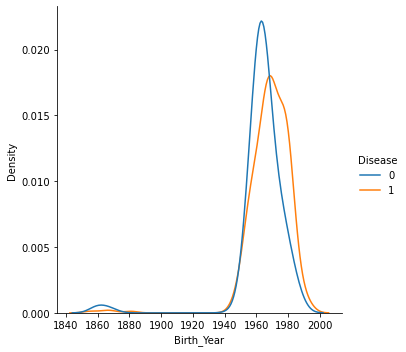

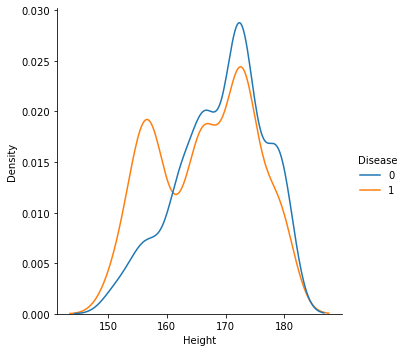

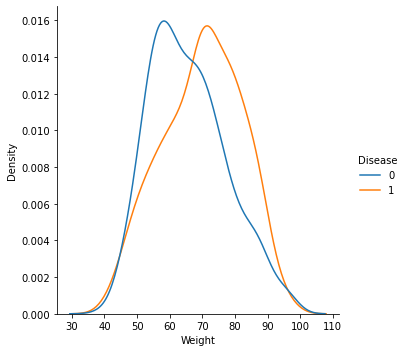

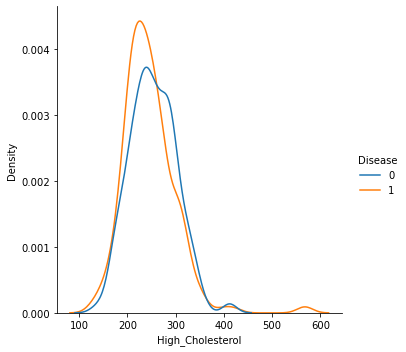

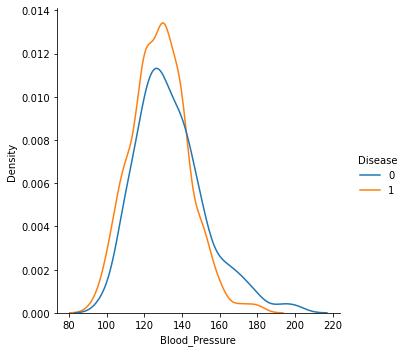

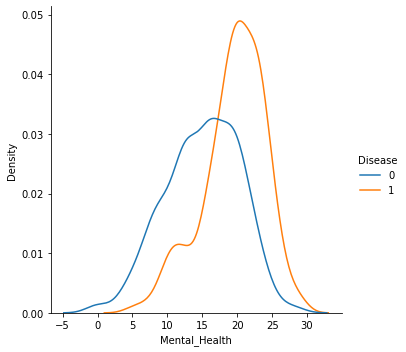

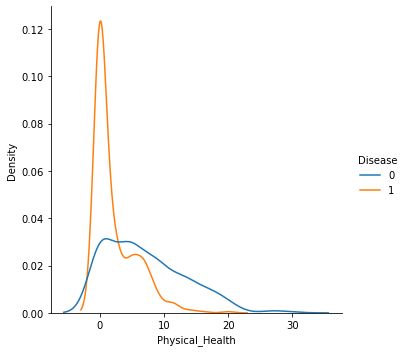

In [20]:
for col in train_df[metric_features].columns:
    sns.displot(train_df, x=col, hue="Disease", kind="kde")

From this output we can see the tendencies of the target for different values in the variables. <br>
- On _Birth Year_ and _Weight_ while people with the disease seem to have a higher distribution, the difference isn't significant.
- On _Height_ there is a spike in the diseased people on lower heights, but otherwise the distribution is similar in both cases.
- On _High Colesterol_ and _Blood Pressure_ people without the disease seem to have a slightly higher distribution as they has a heavier right tail, except for an outlier of the variable _High Colesterol_ that has the disease.
- _Mental Health_ has a heavier left tail on the not sick people
- On _Physical Health_ the difference in the left tail of the two groups makes it a good variable to consider converting into a dummy for above or below 10 (from which we can see a significant difference in the target value)

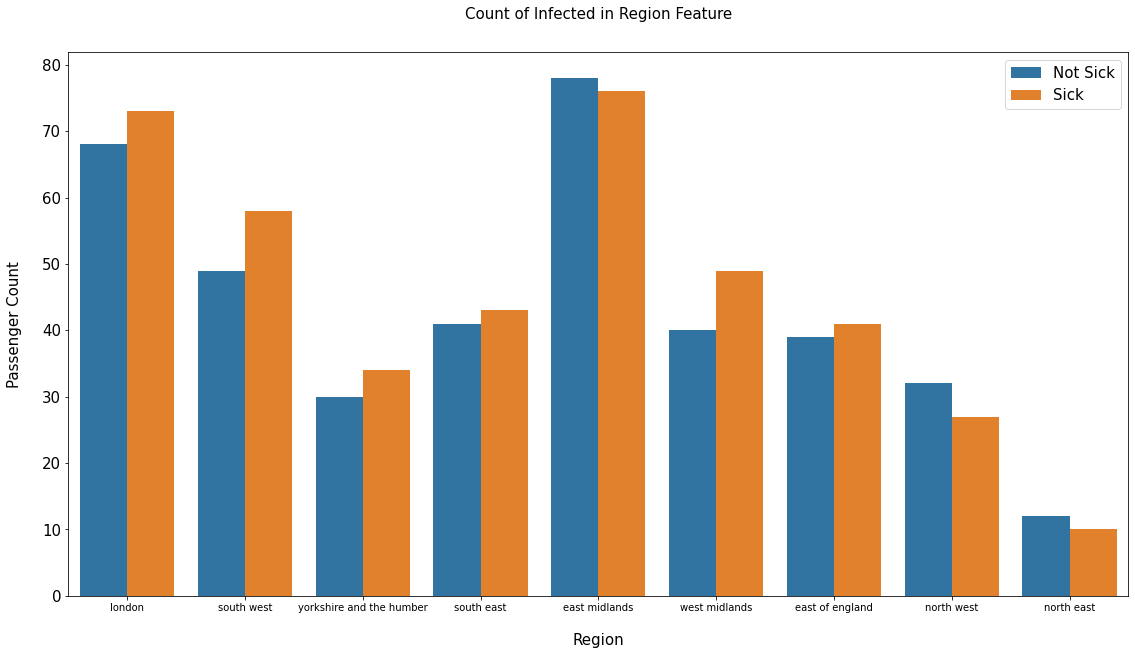

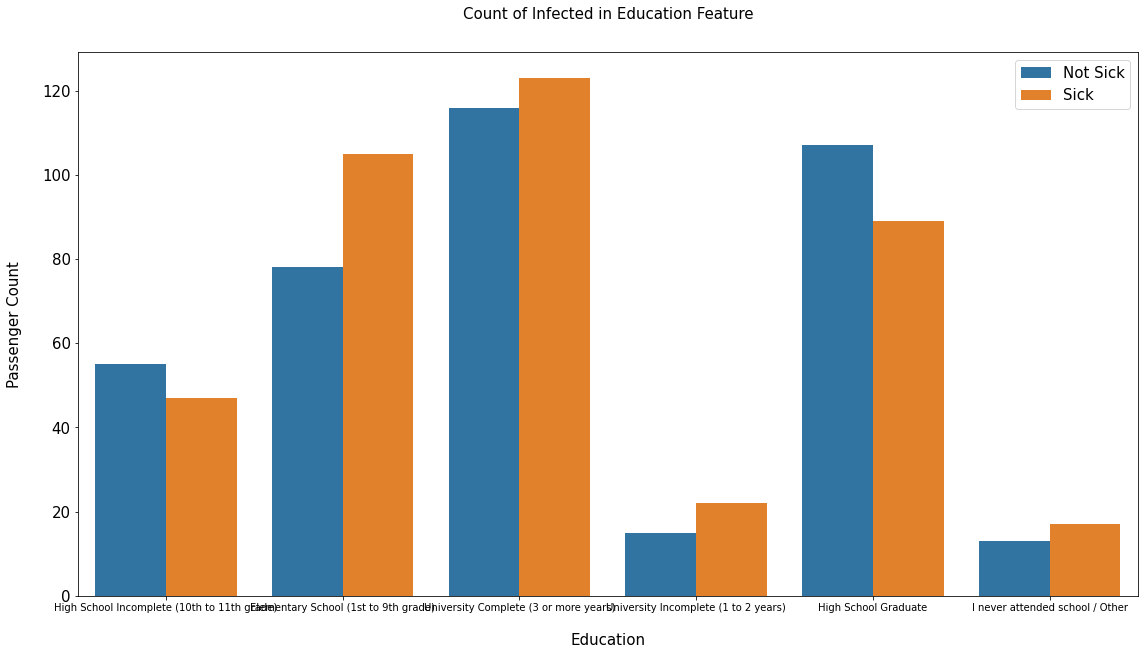

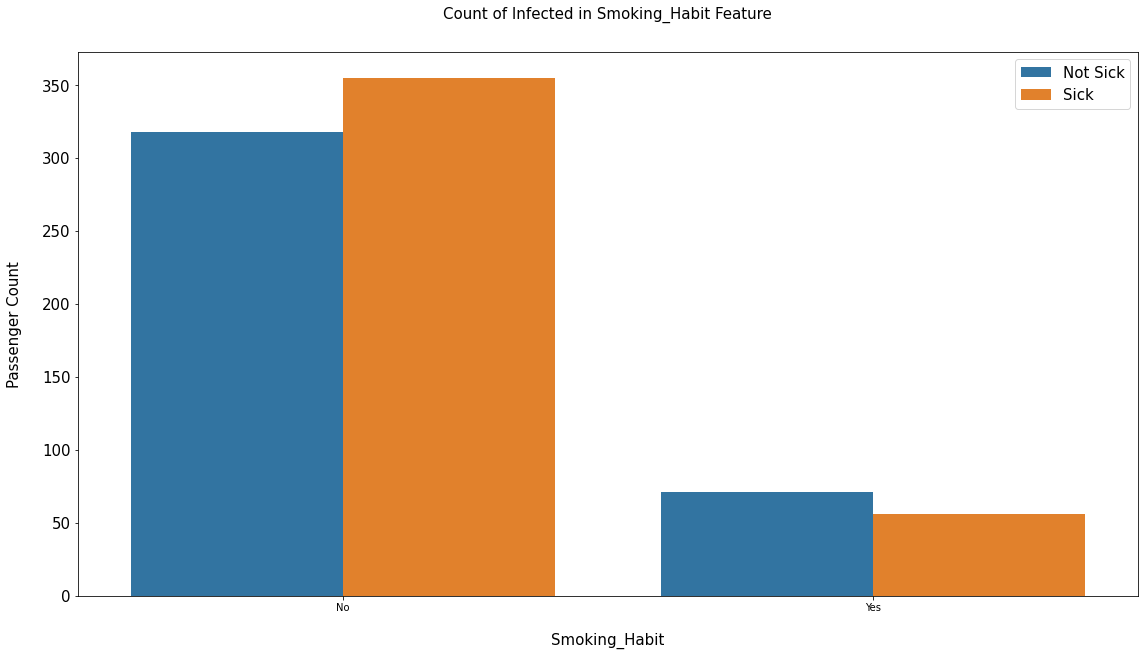

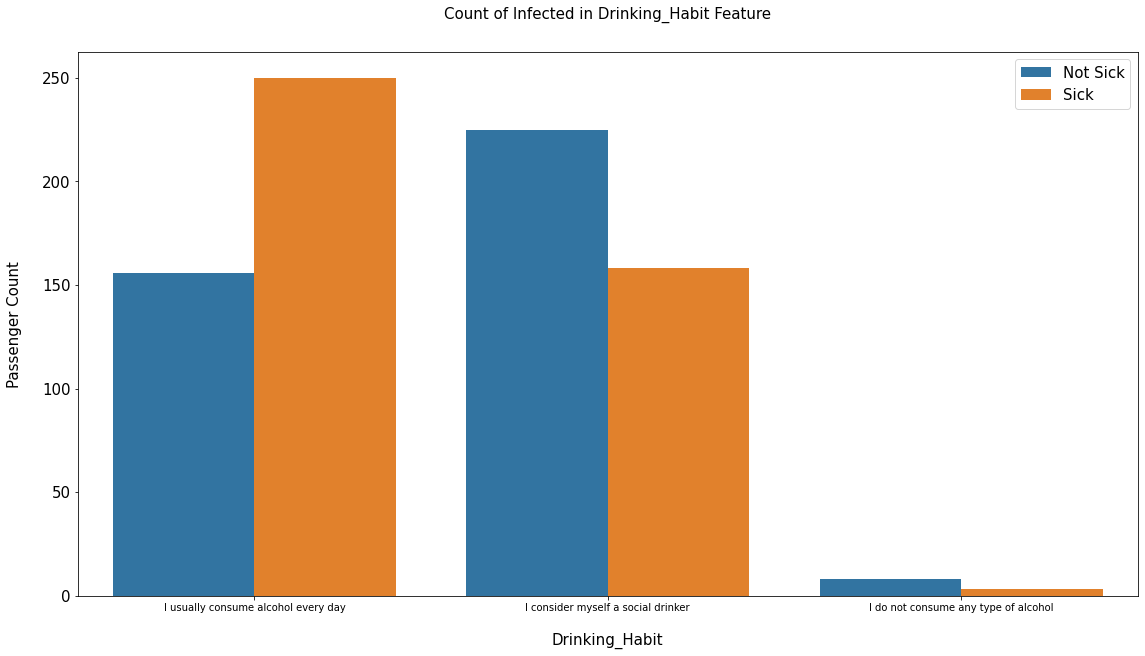

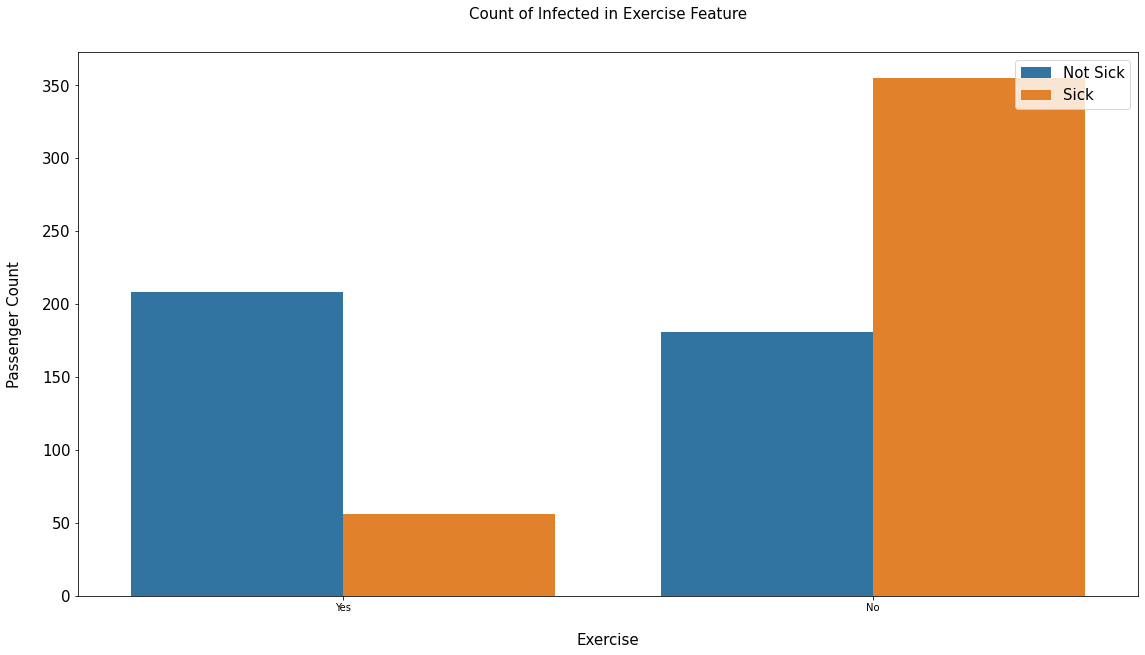

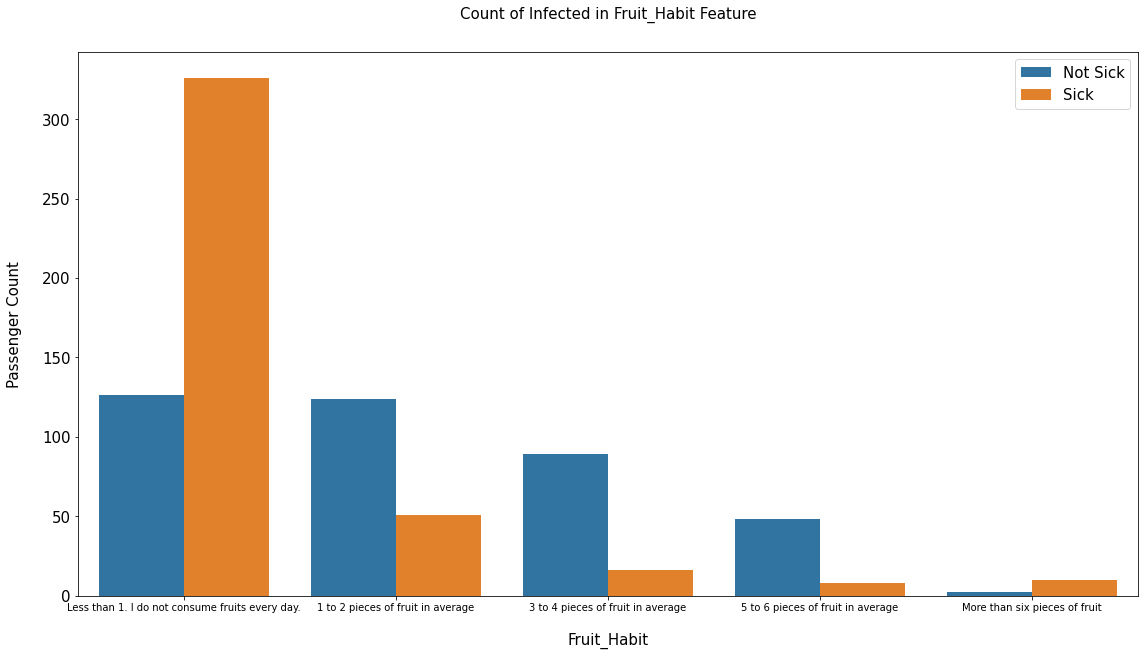

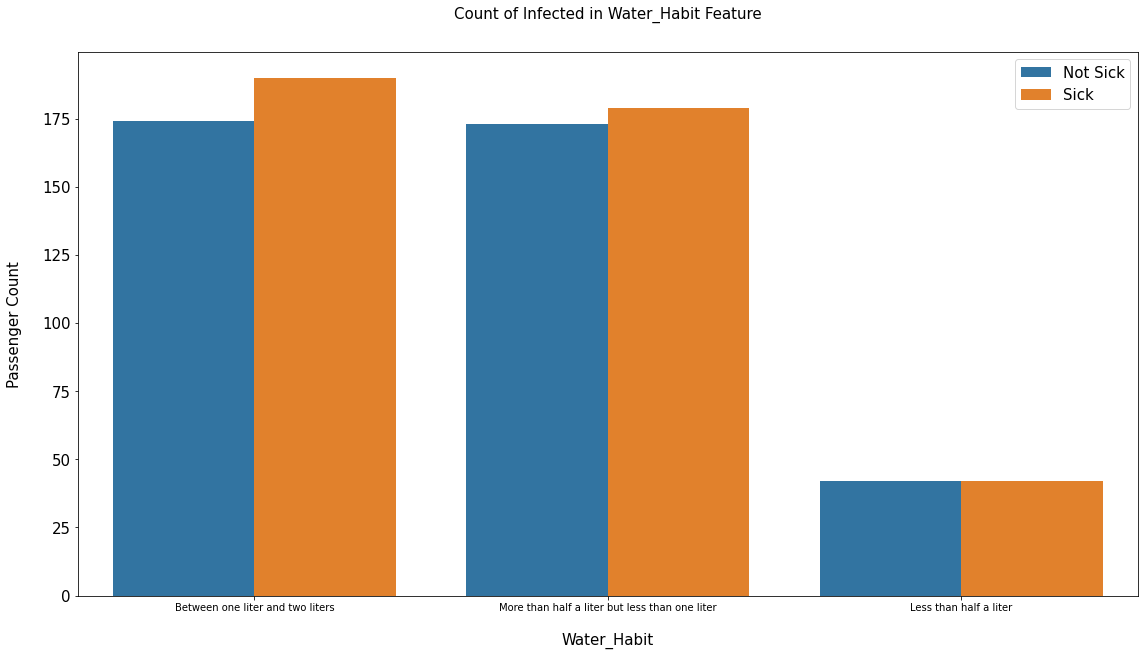

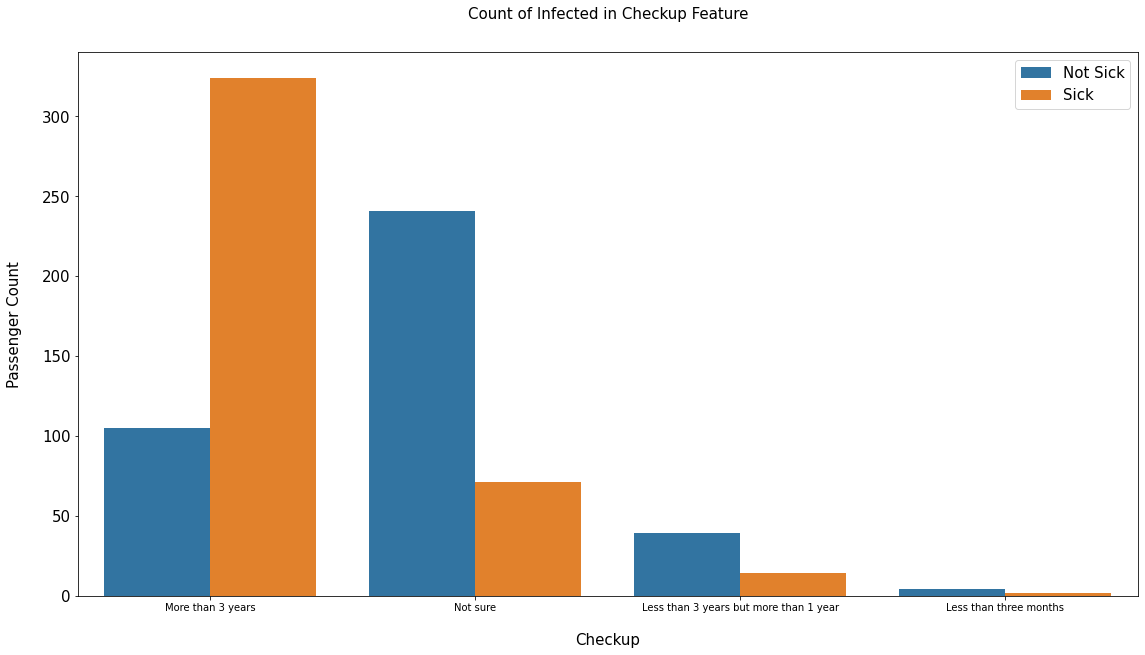

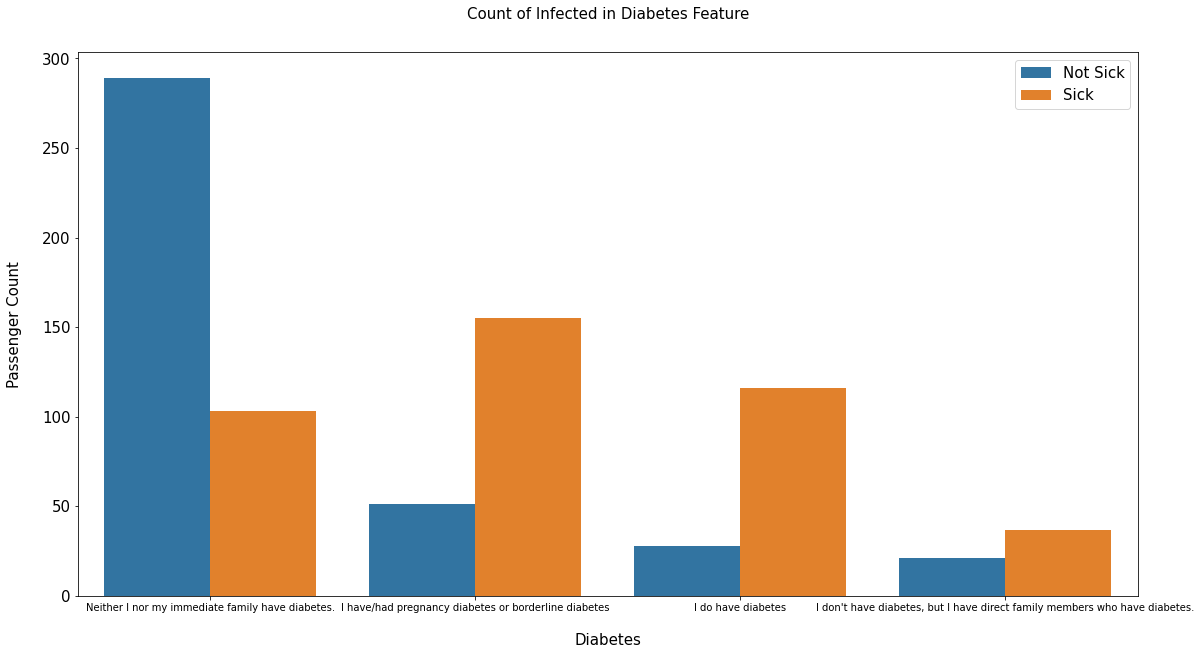

In [21]:
for i in original_non_metric_features:
    fig, axs = plt.subplots(figsize=(19, 10))
    sns.countplot(x=i, hue='Disease', data=train_df)

    plt.xlabel(i, size=15, labelpad=20)
    plt.ylabel('Passenger Count', size=15, labelpad=20)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(['Not Sick', 'Sick'], loc='upper right', prop={'size': 15})
    plt.title('Count of Infected in {} Feature'.format(i), size=15, y=1.05)

    plt.show()

The visualization supports that the variables Region, Education, and Smoking_Habit, Water_Habit seem to be unrelated to the output and that the variables Drinking_Habit, Exercise, Fruit_habit, Height, Weight, Checkup ,and Diabetes have some degree of correlation to the output.

<a class="anchor" id="7th-bullet">

## 3.3. Check for outliers
    
<a name="3.3."></a>
</a>

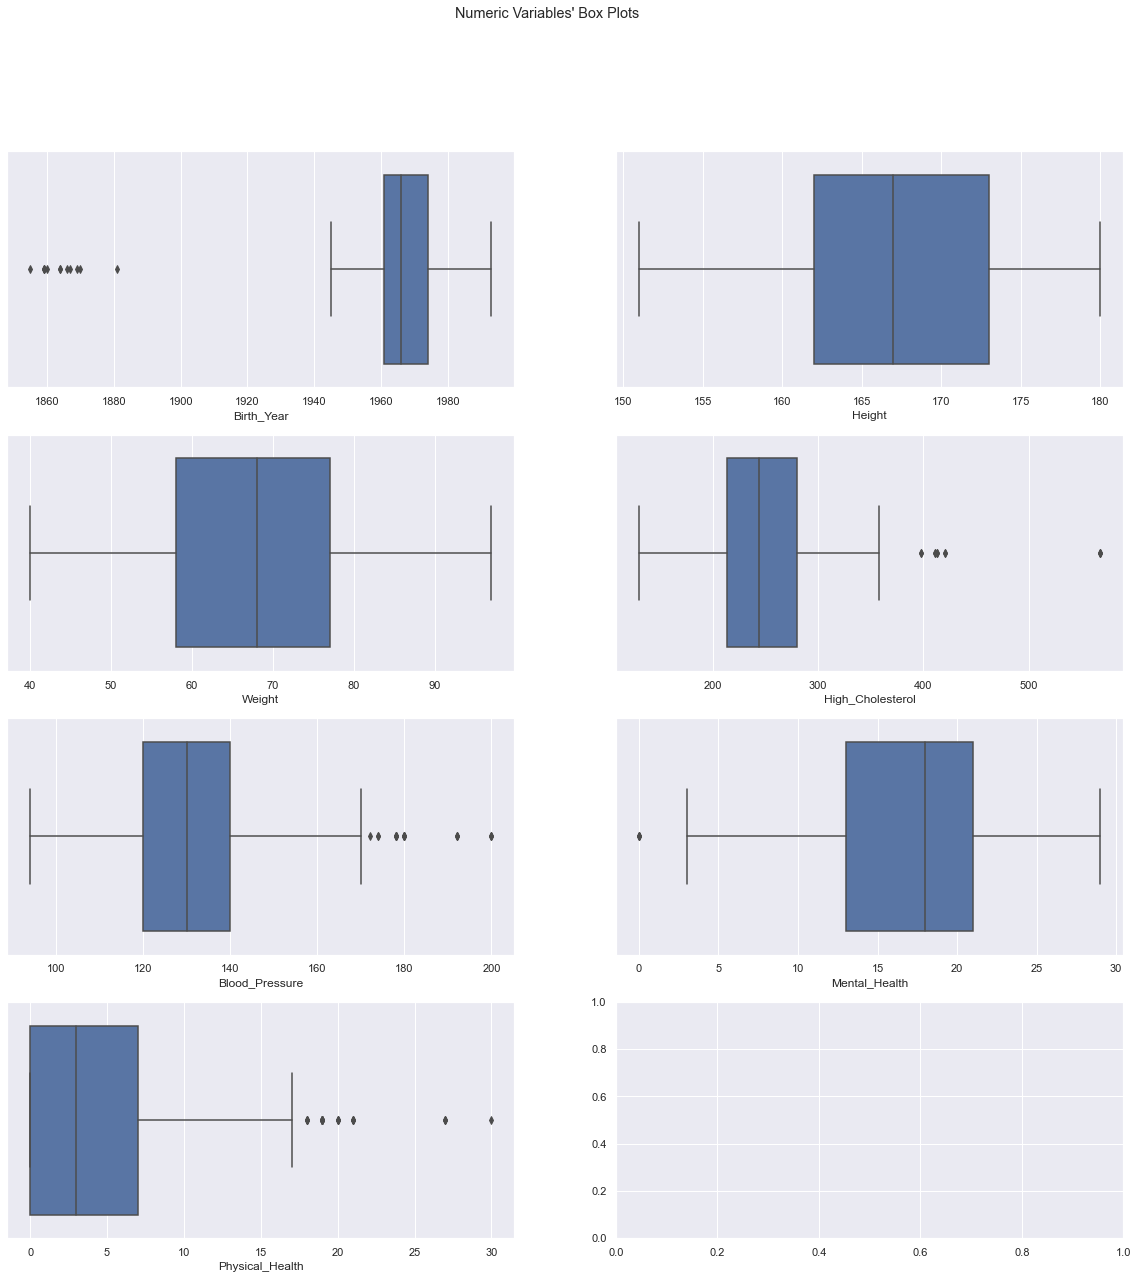

In [22]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features)/4), figsize=(20, 20))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train_df[feat
                          ], ax=ax)
    
# centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.show()

birth_year has inconsistencies - incorrect birth years 

High_Cholesterol has outliers - high values

Blood_Pressure has outliers - high values

Mental_Health has outlier(s) - low value(s)

Physical_Health has outliers - high values 

In order to better visualize the severity of the outliers we have graphed the histograms.

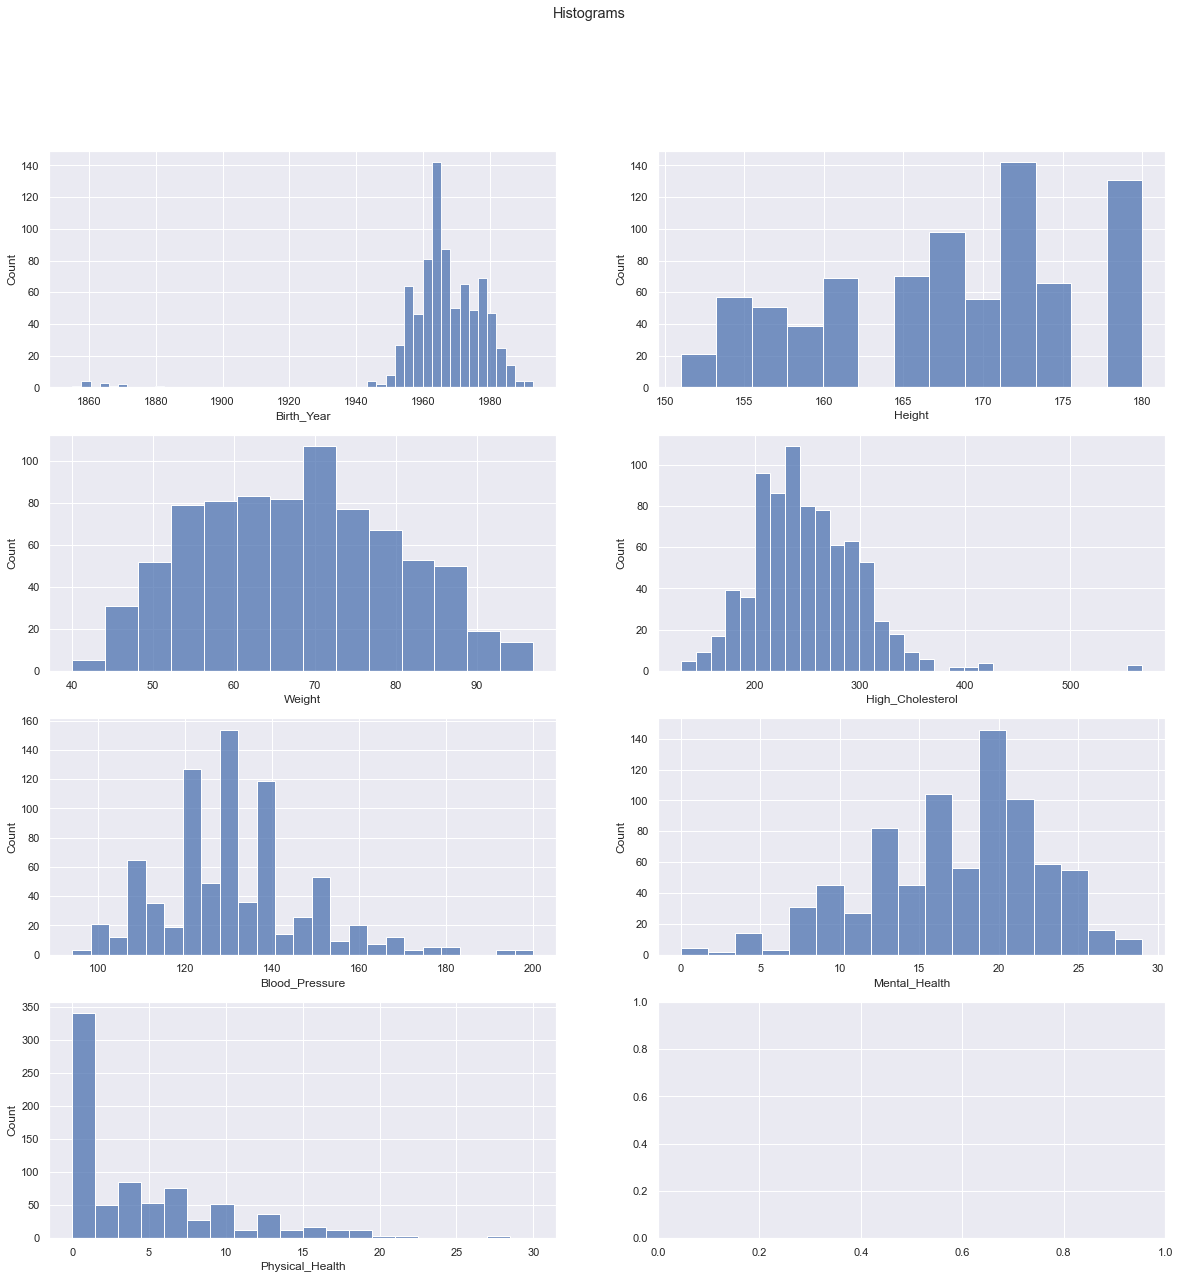

In [23]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features)/4), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.histplot(x=train_df[feat], ax=ax)
    
# Centered title to the figure:
title = "Histograms"

plt.suptitle(title)
plt.show()

Since the outliers of birth_year, high_cholesterol and physical health are significantly removed from the other values, and there are few of these values, it was decided to remove them, also keeping in mind what was said previously, that theses values in Birth_year and High_Cholesterol should not be impossible.

<a class="anchor" id="7th-bullet">

## 3.4. Relationships between variables
    
<a name="3.4."></a>
</a>

In [24]:
"""
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
g=sns.pairplot(train_df, diag_kind="hist")
g.map_upper(sns.kdeplot, levels=4, color=".2")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()"""

'\n# Pairwise Relationship of Numerical Variables\nsns.set()\n\n# Setting pairplot\ng=sns.pairplot(train_df, diag_kind="hist")\ng.map_upper(sns.kdeplot, levels=4, color=".2")\n\n# Layout\nplt.subplots_adjust(top=0.95)\nplt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)\n\nplt.show()'

From the pairplot we chose the pairs of variables that seemed to have a relationship, so that we could investigate further. There seemed to be a tendency between Height and Weight, Weight and Mental_Health, Birth_Year with Mental_Health and Blood_Pressure, and Weight with High_Cholesterol. 
This piece of code was commented for performance reasons.

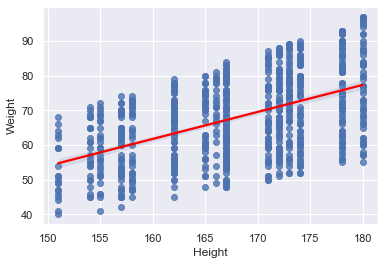

In [25]:
a=sns.regplot(x="Height", y="Weight", data=train_df)
regline = a.get_lines()[0]
regline.set_color('red')

From the graph above it is evident that there is a positive correlation between Height and Weight, so it might be wise to either combine those variables into one, or maybe choose one of them so that there isn't a lot of repeated information in the dataset. 

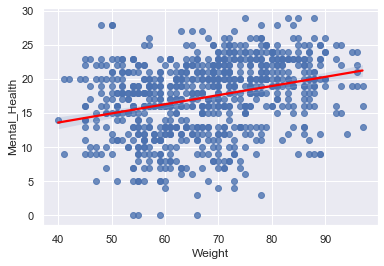

In [26]:
#sns.scatterplot(data= train_vis, x= "Mental_Health", y= "Weight")
a=sns.regplot(x="Weight", y="Mental_Health", data=train_df)
regline = a.get_lines()[0]
regline.set_color('red')

There isn't a strong relationship between the two variables, as the points have a big variability from the best fitting line. 

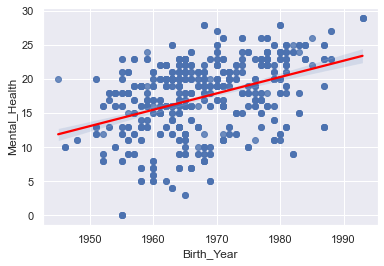

In [27]:
train_vis= train_df[train_df['Birth_Year']>1920]
#sns.scatterplot(data= train_vis, x= "Birth_Year", y= "Mental_Health")
a=sns.regplot(x="Birth_Year", y="Mental_Health", data=train_vis)
regline = a.get_lines()[0]
regline.set_color('red')

To be able to compare the general tendency, it was important to remove the outliers from Birth_Year that greatly impacted the visualizations. The previous graph shows a fairly good fit of the data to a positive linear relationship between the variables. 

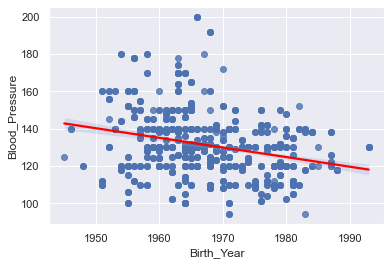

In [28]:
#sns.scatterplot(data= train_vis, x= "Birth_Year", y= "Blood_Pressure")
a=sns.regplot(x="Birth_Year", y="Blood_Pressure", data=train_vis)
regline = a.get_lines()[0]
regline.set_color('red')

The values are more dispersed and the points seem to be quite far from the best fitting line, the relationship doesn't seem to be very strong.

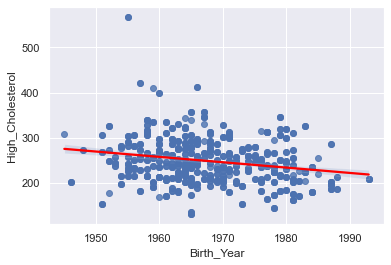

In [29]:
#sns.scatterplot(data= train_df, x= "Birth_Year", y= "High_Cholesterol")
a=sns.regplot(x="Birth_Year", y="High_Cholesterol", data=train_vis)
regline = a.get_lines()[0]
regline.set_color('red')

There is only a slight difference in the behaviour of the High_Cholesterol in reference to the Birth_Year, even though there isn't much error associated with the best fitting line. 

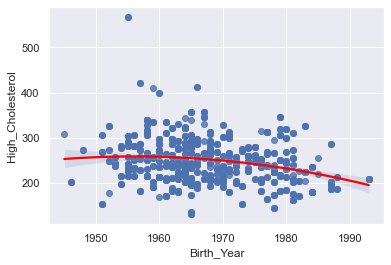

In [30]:
#sns.scatterplot(data= train_df, x= "Weight", y= "High_Cholesterol")
a=sns.regplot(x="Birth_Year", y="High_Cholesterol", order=2, data=train_vis)
regline = a.get_lines()[0]
regline.set_color('red')

The pairplot suggested a quadratic relationship between the two variables. However, when looking more closely at the graph, that doesn't seem to be the case. In fact, there doesn't seem to be any kind of relationship between the two variables.

<div class="alert alert-block alert-info">
    
# 4. Data Cleaning and Wrangling

<a name="Cleaning"></a>
</div>

Before performing any changes in the dataset, we are going to save the original one

In [31]:
train_df_ori = train_df.copy()

<a class="anchor" id="7th-bullet">

## 4.1. Outlier Treatment
    
<a name="4.1."></a>
</a>

The birth years before 1900 are removed considering that is impossible for those people to be alive. An error must have been made when collecting the data. The abnormally high value of High Cholosterol was removed too.
The 4 outliers on Physical Health were removed aswell.

In [32]:
filter1 = (train_df.Birth_Year>=1920) & (train_df.High_Cholesterol<500) & (train_df.Physical_Health<25)

train_df = train_df[filter1]

print('Percentage of data kept after removing outliers:', np.round(train_df.shape[0] / train_df_ori.shape[0], 4)*100, '%')


Percentage of data kept after removing outliers: 97.88 %


The percentage of deleted records is less than 3%, which is within the acceptable range to remove them.

<a class="anchor" id="7th-bullet">

## 4.2. Create New Features
    
<a name="4.2."></a>
</a>

#### Convert Birth_Year to Age

Since *Age* is more easily interpretable than Birth Year, we decided to create this new variable. 

In [33]:
current_time = datetime.datetime.now()
current_year=current_time.year

train_df['Age']= current_time.year - train_df['Birth_Year']
train_df=train_df.drop(['Birth_Year'], axis=1)

#### Joining categories in the variable Checkup

Since in the *Checkup* variable only 6 observations have the category "Less than three months", we decided to join it with the closest one (both interpretation wise, and in target distribution)

In [34]:
print(train_df.groupby('Checkup')['Disease'].mean().sort_values(), "\n")
train_df=train_df.replace(to_replace=["Less than 3 years but more than 1 year", "Less than three months" ], value = 'Less than 3 years')
print(train_df.groupby('Checkup')['Disease'].mean().sort_values())

Checkup
Not sure                                  0.223684
Less than 3 years but more than 1 year    0.264151
Less than three months                    0.333333
More than 3 years                         0.764286
Name: Disease, dtype: float64 

Checkup
Not sure             0.223684
Less than 3 years    0.271186
More than 3 years    0.764286
Name: Disease, dtype: float64


#### Binning the Variables High Cholesterol and Blood Pressure 

<p>We decided to try binning the variables Blood_Pressure and High_Cholesterol after doing some research into them</p>
<p>The sub-groups for Blood_Pressure were found on the American Heart Association website. The categories can be found on the following link: <a href="https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings">Understanding Blood Pressure Readings</a></p>
<p>We found the categories for the High_Cholesterol on the MedilinePlus website from the National Institutes of Health of the U.S. The categories can be found on the following link: <a href="https://medlineplus.gov/lab-tests/cholesterol-levels/">Cholesterol Levels</a></p>

In [35]:
bins_bp = [0, 120, 130, 140, 180, 210]
bp = ["Normal", "Elevated", "Hypertension stage 1", "Hypertension stage 2", "Hypertensive crisis" ]
train_df['Category_BP'] = pd.cut(train_df["Blood_Pressure"], bins_bp, labels = bp).astype('object')

In [36]:
bins_hc = [0, 200, 240, 600]
hc = ["Normal", "Elevated", "High" ]
train_df['Category_HC'] = pd.cut(train_df["High_Cholesterol"], bins_hc, labels = hc).astype('object')

#### Creating Variable for the extremes on Fruit Habits

In the *Fruit_Habit* variable we realized that the extreme values of the variable had a significant larger percentage of diseased people. So, in an effort to facilitate the models job of recognizing patterns, we decided to create a binary variable that says if it's an extreme value of the variable or not.

In [37]:
train_df['Fruit_Extremes'] = np.where(train_df['Fruit_Habit'].isin(['Less than 1. I do not consume fruits every day.', 'More than six pieces of fruit ']),1,0)
print(train_df.groupby('Fruit_Extremes')['Disease'].mean().sort_values())

Fruit_Extremes
0    0.250000
1    0.722348
Name: Disease, dtype: float64


#### Ranks

In [38]:
#transform orginal categorical categories into ranks (since the categories in the variables can be ordered logically)

train_df["Education"]= train_df["Education"].map({'I never attended school / Other':0, 'Elementary School (1st to 9th grade)':1,
        'High School Incomplete (10th to 11th grade)':2, 'High School Graduate':3 ,'University Incomplete (1 to 2 years)':4 , 
        'University Complete (3 or more years)':5, np.nan : 10}) # NaN values are converted to 10, which will later be
                                                                 # converted back to Nan VALUES, to preserve them

train_df["Drinking_Habit"]= train_df["Drinking_Habit"].map({'I do not consume any type of alcohol':0, 
        'I consider myself a social drinker':1,'I usually consume alcohol every day':2}) 

train_df["Fruit_Habit"]= train_df["Fruit_Habit"].map({'Less than 1. I do not consume fruits every day.':0, 
        '1 to 2 pieces of fruit in average':1, '3 to 4 pieces of fruit in average':2,'5 to 6 pieces of fruit in average':3,
        'More than six pieces of fruit':4}) 

train_df["Water_Habit"]= train_df["Water_Habit"].map({'Less than half a liter':0, 
         'More than half a liter but less than one liter':1,'Between one liter and two liters':2})

train_df["Checkup"]= train_df["Checkup"].map({'Not sure':0, 'Less than 3 years':1, 'More than 3 years':2}) 

train_df["Diabetes"]= train_df["Diabetes"].map({'Neither I nor my immediate family have diabetes.':0, 
        'I don\'t have diabetes, but I have direct family members who have diabetes.':1, 
        'I have/had pregnancy diabetes or borderline diabetes':2,'I do have diabetes':3})

train_df["Category_HC"]= train_df["Category_HC"].map({'Normal':1, 'Elevated':2,'High':3})

train_df["Category_BP"]= train_df["Category_BP"].map({'Normal':1, 'Elevated':2, 'Hypertension stage 1':3, 
                                                      'Hypertension stage 2':4 , 'Hypertensive crisis':5})

In [39]:
train_df['Exercise']=train_df['Exercise'].map(dict(Yes=1, No=0))
train_df['Smoking_Habit']=train_df['Smoking_Habit'].map(dict(Yes=1, No=0))

#### Create  _Female_ variable from the _Name_ feature

In [40]:
#Binary variable - Female
train_df['Female'] = (train_df['Name'].str.contains('Mrs')).astype(int)

In [41]:
train_df['Female'].value_counts()

0    558
1    225
Name: Female, dtype: int64

#### Create BMI variable (Body Mass Index)

In [42]:
train_df['BMI']=train_df['Weight']/(train_df['Height']**2)

#### Dummy Variables

In [43]:
dummies = pd.get_dummies(train_df["Region"], prefix='Region', drop_first= True)
# Save original Dataframe te use in Feature Selection - Mutual information
train_df_without_dummies = train_df.copy() 
# Join the encoded df
train_df = train_df.drop("Region",axis = 1).join(dummies)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 1167 to 1117
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             783 non-null    object 
 1   Education                        783 non-null    int64  
 2   Disease                          783 non-null    int64  
 3   Smoking_Habit                    783 non-null    int64  
 4   Drinking_Habit                   783 non-null    int64  
 5   Exercise                         783 non-null    int64  
 6   Fruit_Habit                      783 non-null    int64  
 7   Water_Habit                      783 non-null    int64  
 8   Height                           783 non-null    int64  
 9   Weight                           783 non-null    int64  
 10  High_Cholesterol                 783 non-null    int64  
 11  Blood_Pressure                   783 non-null    int64  
 12  Mental_Health     

We need the dummy variables to be able to impute the missing values, however, we should have the categories perserved in one variable to be able to do feature selection. If after the feature selection the dummies are necessary we will retrieve them.

#### Cheking the correlation of the new variables with the output

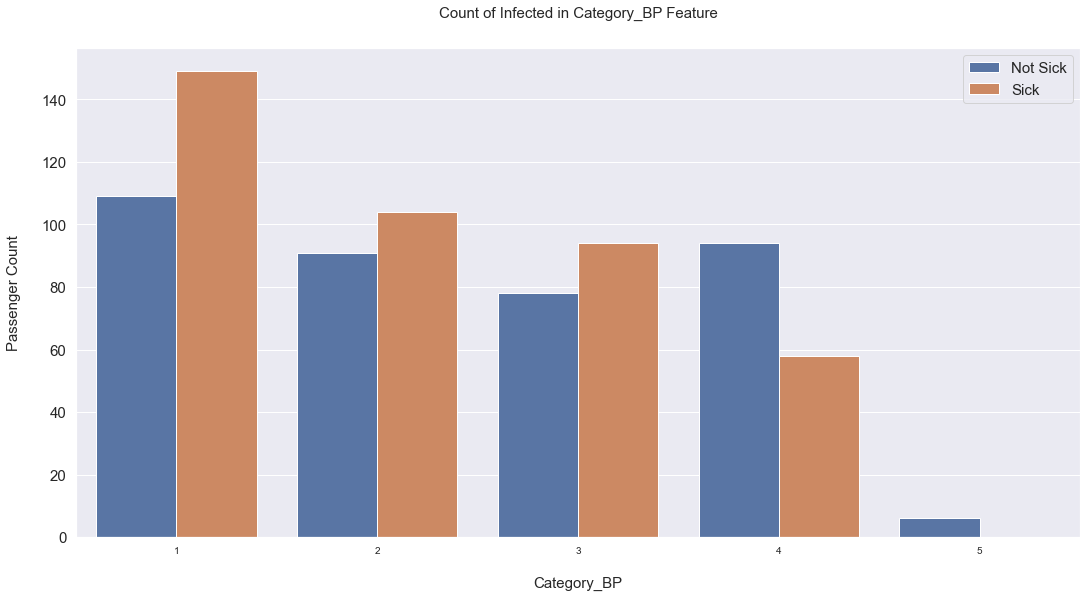

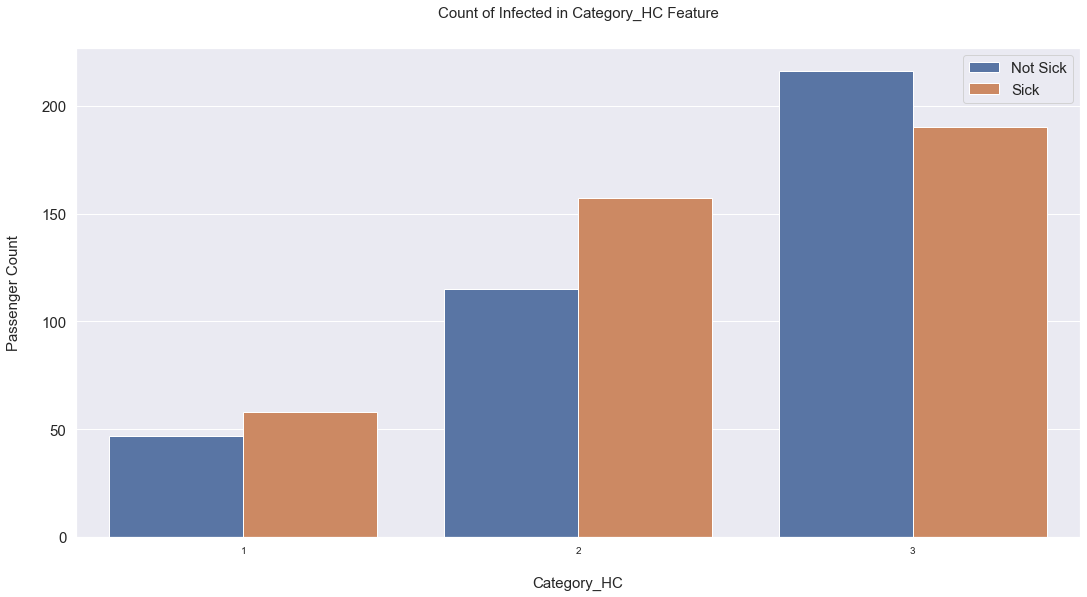

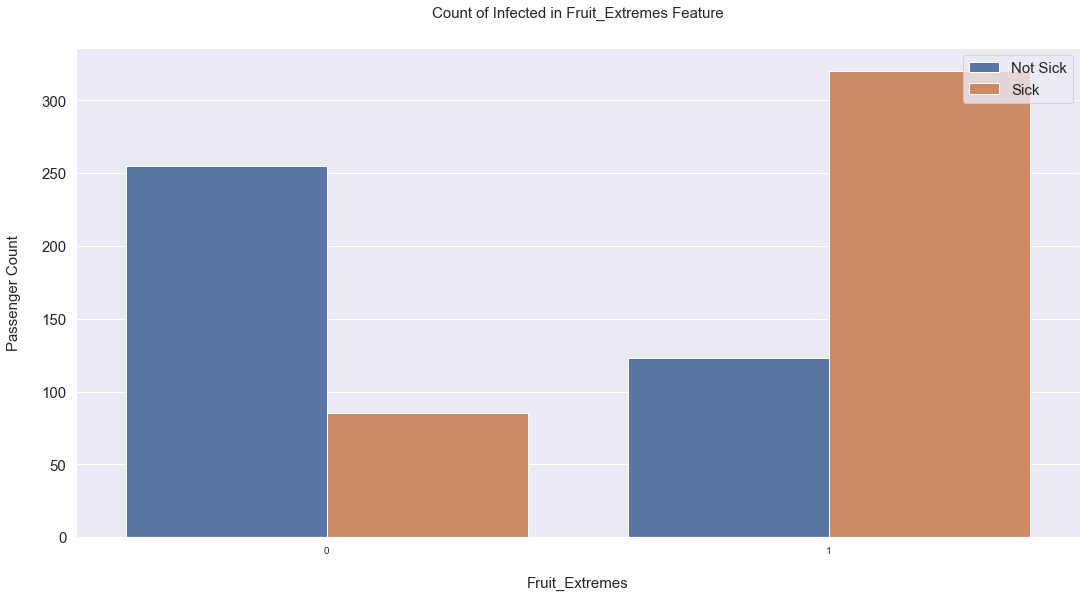

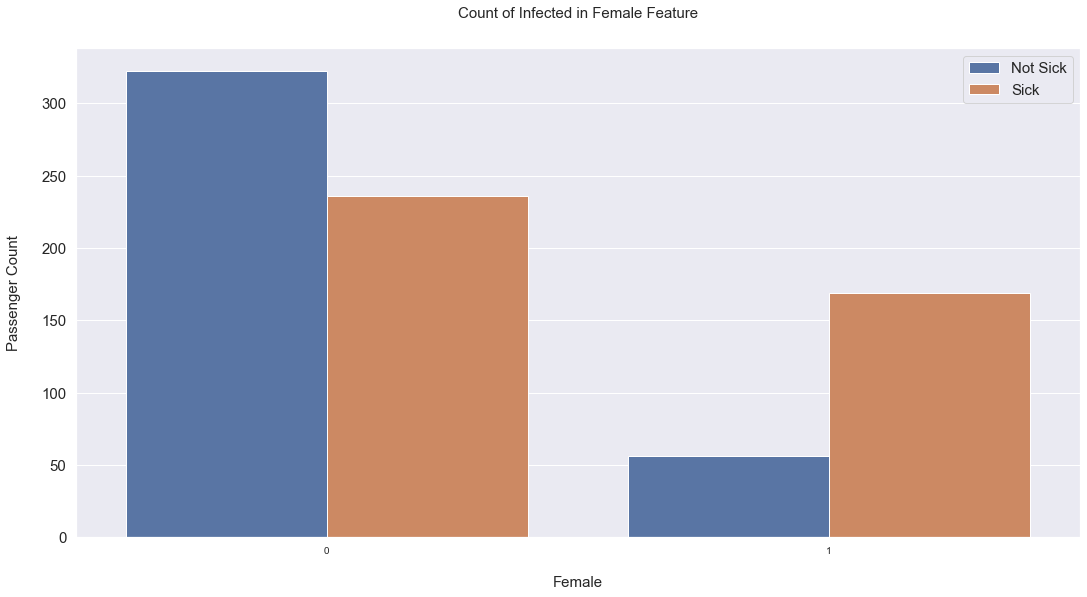

In [45]:
new_non_metric_features=['Category_BP','Category_HC','Fruit_Extremes',
 'Female']

for i in new_non_metric_features:
    fig, axs = plt.subplots(figsize=(18, 9))
    sns.countplot(x=i, hue='Disease', data=train_df)

    plt.xlabel(i, size=15, labelpad=20)
    plt.ylabel('Passenger Count', size=15, labelpad=20)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(['Not Sick', 'Sick'], loc='upper right', prop={'size': 15})
    plt.title('Count of Infected in {} Feature'.format(i), size=15, y=1.05)

    plt.show()

From the previous output, the majority of the variables do not have a strong predictive power. However, there are exceptions like *Fruit_Extreme* and *Female* (up to some point in 1). However, it is not enough to discard these variables, as sometimes the information that the variables give even if it has a small informative power can be complementary to the information provided by other variables. This will be explored further in the Feature Selection section.

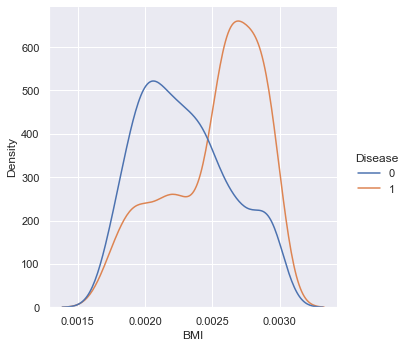

In [46]:
sns.displot(train_df, x='BMI', hue="Disease", kind="kde")

People with high BMI seem to be more propense to having caught the desease.

<a class="anchor" id="7th-bullet">

## 4.3. Treatment of Missing Values
    
<a name="4.3."></a>
</a>



Check for the percentage of missing values.

In [47]:
#% of missing values
train_df['Education'].replace(10, np.nan, inplace=True) # Converting 10 back to NaN-values
print('There percentage of missing values is',round(train_df.Education.isna().sum()/len(train_df_ori)*100, 3),'% of the dataframe.')

There percentage of missing values is 1.5 % of the dataframe.


The percentage of missing values is small so should be safe safe to remove them without a causing a big impact on the dataset. However, there is also the option of imputing the missing values. We tried both. Imputation of missing values through KNN led to the best results.

In [48]:
inp=train_df
inp=inp.drop(["Name"],axis=1)
inp=inp.drop(["Disease"],axis=1)

imputer = KNNImputer(n_neighbors=7)
inp = pd.DataFrame(imputer.fit_transform(inp),index=inp.index ,columns = inp.columns)

train_df['Education']=(round(inp['Education']))
train_df["Education"]=train_df["Education"].astype(int)

# Used in Feature Selection - Mutual Information
train_df_without_dummies["Education"]=train_df["Education"]

<a class="anchor" id="7th-bullet">

## 4.4. Split the Data
    
<a name="4.4."></a>
</a>

We now separate the dataset into categorical and numerical variables and then split the dataset in data for training and validation.

In [49]:
#Update metric and non metric features
metric_features = ['Age','Height','Weight','High_Cholesterol','Blood_Pressure','Mental_Health','Physical_Health', 'BMI']
Y=train_df["Disease"]
train_df=train_df.drop(["Disease"],axis=1)
train_df=train_df.drop(["Name"],axis=1)
non_metric_features = train_df.columns.drop(metric_features).to_list()

# Used in Feature Selection - Mutual Information
train_df_without_dummies=train_df_without_dummies.drop(["Disease"],axis=1)
train_df_without_dummies=train_df_without_dummies.drop(["Name"],axis=1)

In [50]:
#Split with the dummies
X_train, X_val, y_train, y_val = train_test_split(train_df,Y, test_size = 0.2, random_state = 0, stratify = Y, shuffle = True)

#Split without the dummies - Used in Feature Selection - Mutual Information
non_metric_features_og = train_df_without_dummies.columns.drop(metric_features).to_list()
X_train_og, X_val_og, y_train_og, y_val_og = train_test_split(train_df_without_dummies,Y, test_size = 0.2, random_state = 0, stratify = Y, shuffle = True)
X_train_cat_og = X_train_og[non_metric_features_og]
X_val_cat_og = X_val_og[non_metric_features_og]

<a class="anchor" id="7th-bullet">

## 4.5. Scaling
    
<a name="4.5."></a>
</a>

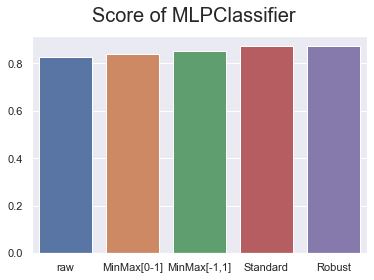

0.828 0.8408 0.8535 0.8726 0.8726


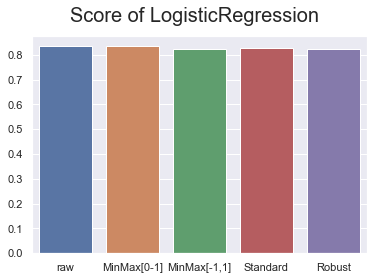

0.8344 0.8344 0.8217 0.828 0.8217


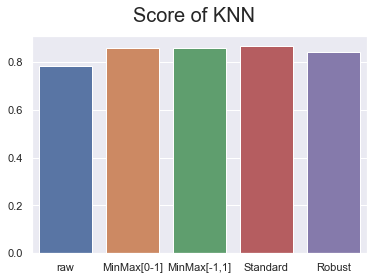

0.7834 0.8599 0.8599 0.8662 0.8408


In [51]:
# Steps that will be taken:
# Create a Scaler instance  and fit to your train data
# Transform the train data by applying the scale obtained in the previous command
# Transform your validation data by applying the scale obtained in the first command
# Create a new classifier and fit to your scaled training data

min_max1 = MinMaxScaler().fit(X_train)
min_max1_X_train = min_max1.transform(X_train)
min_max1_X_val = min_max1.transform(X_val)
model_min_max1_mlp = MLPClassifier().fit(min_max1_X_train, y_train)
model_min_max1_log = LogisticRegression().fit(min_max1_X_train, y_train)
model_min_max1_extra = KNeighborsClassifier(n_neighbors=9).fit(min_max1_X_train, y_train)

# range between -1 and 1
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_X_val = min_max2.transform(X_val)
model_min_max2_mlp = MLPClassifier().fit(min_max2_X_train, y_train)
model_min_max2_log = LogisticRegression().fit(min_max2_X_train, y_train)
model_min_max2_extra = KNeighborsClassifier(n_neighbors=9).fit(min_max2_X_train, y_train)

scaler = StandardScaler().fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_val = scaler.transform(X_val)
model_scaler_mlp = MLPClassifier().fit(scaler_X_train, y_train)
model_scaler_log = LogisticRegression().fit(scaler_X_train, y_train)
model_scaler_extra = KNeighborsClassifier(n_neighbors=9).fit(scaler_X_train, y_train)

robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_val = robust.transform(X_val)
model_robust_mlp = MLPClassifier().fit(robust_X_train, y_train)
model_robust_log = LogisticRegression().fit(robust_X_train, y_train)
model_robust_extra = KNeighborsClassifier(n_neighbors=9).fit(robust_X_train, y_train)

#Comparison of the different scalers for 3 methods

model= MLPClassifier().fit(X_train, y_train)

x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [model.score(X_val, y_val), model_min_max1_mlp.score(min_max1_X_val, y_val), 
    model_min_max2_mlp.score(min_max2_X_val, y_val),model_scaler_mlp.score(scaler_X_val, y_val),
    model_robust_mlp.score(robust_X_val, y_val)]

sns.barplot(x, y)
plt.suptitle("Score of MLPClassifier", fontsize=20)
plt.show()
print(round(model.score(X_val, y_val), 4), round(model_min_max1_mlp.score(min_max1_X_val, y_val), 4), 
    round(model_min_max2_mlp.score(min_max2_X_val, y_val), 4), round(model_scaler_mlp.score(scaler_X_val, y_val),4),
    round(model_robust_mlp.score(robust_X_val, y_val),4))

model= LogisticRegression().fit(X_train, y_train)

x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [model.score(X_val, y_val), model_min_max1_log.score(min_max1_X_val, y_val), 
    model_min_max2_log.score(min_max2_X_val, y_val),model_scaler_log.score(scaler_X_val, y_val),
    model_robust_log.score(robust_X_val, y_val)]

sns.barplot(x, y)
plt.suptitle("Score of LogisticRegression", fontsize=20)
plt.show()
print(round(model.score(X_val, y_val), 4), round(model_min_max1_log.score(min_max1_X_val, y_val), 4), 
    round(model_min_max2_log.score(min_max2_X_val, y_val), 4), round(model_scaler_log.score(scaler_X_val, y_val),4),
    round(model_robust_log.score(robust_X_val, y_val),4))

model= KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [model.score(X_val, y_val), model_min_max1_extra.score(min_max1_X_val, y_val), 
    model_min_max2_extra.score(min_max2_X_val, y_val),model_scaler_extra.score(scaler_X_val, y_val),
    model_robust_extra.score(robust_X_val, y_val)]

sns.barplot(x, y)
plt.suptitle("Score of KNN", fontsize=20)
plt.show()
print(round(model.score(X_val, y_val), 4), round(model_min_max1_extra.score(min_max1_X_val, y_val), 4), 
    round(model_min_max2_extra.score(min_max2_X_val, y_val), 4), round(model_scaler_extra.score(scaler_X_val, y_val),4),
    round(model_robust_extra.score(robust_X_val, y_val),4))

All models regardless of scalings seem to be have very similar performances.

The scaling selected was MinMaxScaler, because it was important that all the variables were comparable, and were in the same range. Since the distribution of the explanatory variables do not have a skewed distribution (or many outliers), the Robust Scaler would have had a similar result. So, in the case of 2 equal solutions, the simpler one is always the best.

In [52]:
features=list(train_df.columns.values)
min_max1 = MinMaxScaler().fit(X_train[features])
X_train[features] = min_max1.transform(X_train[features])
X_val[features] = min_max1.transform(X_val[features])

X_train_num = X_train[metric_features]
X_val_num=X_val[metric_features]
X_train_cat = X_train[non_metric_features]
X_val_cat = X_val[non_metric_features]

<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## 5. Feature Selection
    
<a name="Feature_Selection"></a>
</a>
    

<a class="anchor" id="7th-bullet">

# 5.1 Numerical
    
<a name="numerical"></a>
</a>

<a class="anchor" id="7th-bullet">

## 5.1.1. Filter Methods
    
<a name="Filter_methods"></a>
</a>  


<a class="anchor" id="7th-bullet">

### 5.1.1.1. Univariate variables
    
<a name="Univariate"></a>
</a>

In [53]:
#Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.
X_train_num.var()

Age                 0.035163
Height              0.076462
Weight              0.044993
High_Cholesterol    0.026630
Blood_Pressure      0.026237
Mental_Health       0.034622
Physical_Health     0.060287
BMI                 0.076845
dtype: float64

No variables are Univariate

<a class="anchor" id="8th-bullet">

### 5.1.1.2. Kendall's Correlation
    
<a name="Kendall"></a>
</a>

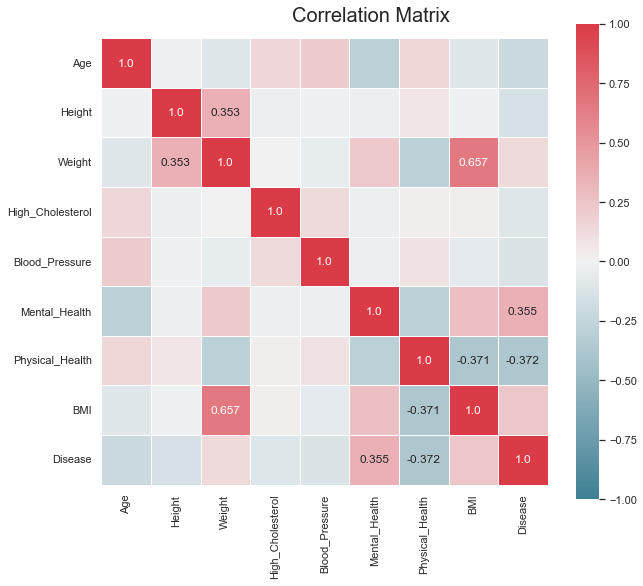

In [54]:
all_num = X_train_num.join(y_train)
cor_ = np.round(all_num.corr(method ='kendall'), decimals=3)

fig = plt.figure(figsize=(10, 8))

# Build annotation matrix (values above |0.3| will appear annotated in the plot)
mask_annot = np.absolute(cor_.values) >= 0.3
annot = np.where(mask_annot, cor_.values, np.full(cor_.shape,"")) 

sns.heatmap(data=cor_, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

The correlations between the *Weight* and *Height* to the *BMI* are expected as the latter was created from the formed two. A more interesting case is the negative correlation between the *BMI* and *Physical_Health*. Still, the correlation isn't high enough to provoke a multicollinearity problem in the models.

<a class="anchor" id="11th-bullet">

## 5.1.2. Wrapper Methods
    
    
<a name="Wrapper"></a>
</a>

<a class="anchor" id="12th-bullet">

### 5.1.2.1 RFE
    
<a name="RFE"></a>
</a>

Uses GradientBoostingClassifier to evaluate which variables are the most important ones to explain the target. 

In [115]:
#no of features
nof_list=list(range(1,8))
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = GradientBoostingClassifier()
    rfe = RFE(model,n_features_to_select=n,step=1)
    X_train_rfe = rfe.fit_transform(X_train_num,y_train)
    X_val_rfe = rfe.transform(X_val_num)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    print(n, score)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n-1] 
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

1 0.7261146496815286
2 0.8726114649681529
3 0.8598726114649682
4 0.8853503184713376
5 0.9044585987261147
6 0.9235668789808917
7 0.9044585987261147
Optimum number of features: 6
Score with 6 features: 0.923567


In [116]:
rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(X = X_train_num, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num.columns)
selected_features

Age                  True
Height              False
Weight              False
High_Cholesterol     True
Blood_Pressure       True
Mental_Health        True
Physical_Health      True
BMI                  True
dtype: bool

<a class="anchor" id="13th-bullet">

## 5.1.3. Embedded Methods
    
<a name="Embedded"></a>
</a>

In [57]:
#function to plot importances
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

<a class="anchor" id="14th-bullet">

### 5.1.3.1. Lasso Regression
    
<a name="Lasso"></a>
</a>

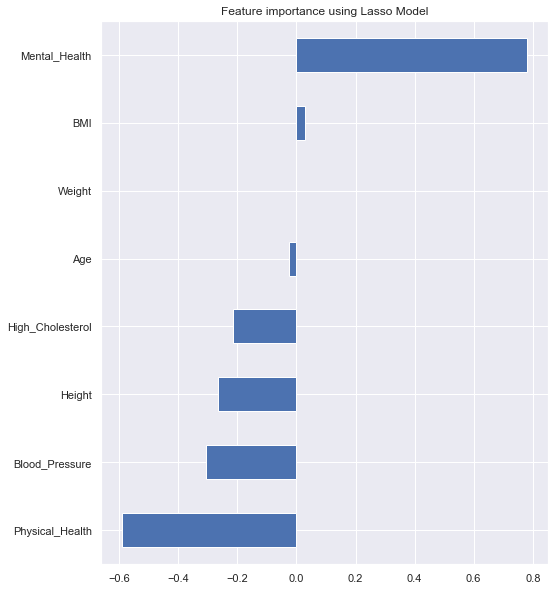

In [58]:
reg = LassoCV()
reg.fit(X_train_num, y_train)
coef = pd.Series(reg.coef_, index = X_train_num.columns)
coef

coef.sort_values()
plot_importance(coef,'Lasso')

<a class="anchor" id="14th-bullet">

### 5.1.3.2. PCA
    
<a name="PCA"></a>
</a>

PCA does not select features, only reduces the dimensions

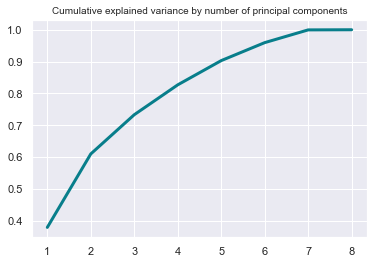

In [59]:
pca = PCA().fit(X_train_num)
pc = pca.transform(X_train_num)
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

Using the Elbow Method there is no clear best for the number of principal components. 

In [60]:
pca.explained_variance_ratio_.cumsum()

array([0.37911779, 0.60989048, 0.73310612, 0.82691406, 0.90306094,
       0.95950809, 0.99952774, 1.        ])

Another method is to preserve the principal components that make up for around 80% of variance (Pearson method). In this case, that is 4 PC's *(the counting in the graph starts at 0)*. To get the interpretation behind the PCA, we need to look at the loadings and assign each variable to it's principal component.

In [61]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train_num.columns) + 1)],
    index=X_train_num.columns
)

#choosing 3 principal components
loadings.iloc[:,:4]


,PC1,PC2,PC3,PC4
Age,0.055946,-0.009402,-0.149186,-0.055948
Height,-0.063719,-0.264114,0.022851,-0.039698
Weight,-0.192602,-0.075839,-0.035012,0.023065
High_Cholesterol,0.006364,0.008790,-0.080880,0.016109
Blood_Pressure,0.029054,-0.006718,-0.070238,0.006498
Mental_Health,-0.093610,0.037272,0.076237,0.051647
Physical_Health,0.161613,-0.092151,-0.029863,0.154542
BMI,-0.253935,0.048787,-0.069219,0.060605


From the previous input se can see that the variables are not correlated with either principal component. This means that they are not important to explain either of them, so the variables are so linearly uncorrelated that it is not possible to create principal components that represent well the variables.

In [62]:
#dataframe with the pricipal components instead of the numerica variables 
X_train_pca = X_train.drop(X_train_num.columns, axis = 1)
X_train_pca['PC 1'] = pc[:, 0]
X_train_pca['PC 2'] = pc[:, 1]
X_train_pca['PC 3'] = pc[:, 2]
X_train_pca['PC 4'] = pc[:, 3]
X_train_pca.head()

,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Checkup,Diabetes,Category_BP,Category_HC,...,Region_north east,Region_north west,Region_south east,Region_south west,Region_west midlands,Region_yorkshire and the humber,PC 1,PC 2,PC 3,PC 4
PatientID,,,,,,,,,,,,,,,,,,,,,
2000,0.6,0.0,0.5,0.0,0.50,1.0,0.5,0.000000,0.75,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.050437,-0.281896,-0.239409,0.063038
1328,1.0,0.0,0.5,0.0,0.75,0.5,1.0,0.000000,0.25,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.237836,-0.492292,-0.421961,-0.005118
1361,0.4,0.0,1.0,0.0,0.75,0.5,0.0,0.666667,0.25,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.329784,-0.036469,-0.026718,-0.000884
1043,0.6,0.0,0.5,0.0,0.00,1.0,0.0,0.000000,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.475843,-0.337302,0.027868,0.039579
1671,0.2,0.0,1.0,0.0,0.50,0.0,0.0,0.000000,0.25,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.298142,-0.192743,0.092012,0.057518


In [63]:
pc_val = pca.transform(X_val_num)
X_val_pca = X_val.drop(X_train_num.columns, axis = 1)
X_val_pca['PC 1'] = pc_val[:, 0]
X_val_pca['PC 2'] = pc_val[:, 1]
X_val_pca['PC 3'] = pc_val[:, 2]
X_val_pca['PC 4'] = pc_val[:, 3]
X_val_pca_num = pd.DataFrame(pc_val[:, 0:3])
X_val_pca.head()

,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Checkup,Diabetes,Category_BP,Category_HC,...,Region_north east,Region_north west,Region_south east,Region_south west,Region_west midlands,Region_yorkshire and the humber,PC 1,PC 2,PC 3,PC 4
PatientID,,,,,,,,,,,,,,,,,,,,,
1987,0.6,0.0,0.5,0.0,0.25,0.5,1.0,1.0,0.75,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.185087,0.270434,-0.099990,-0.052815
1770,0.2,0.0,1.0,0.0,0.00,0.0,0.5,1.0,0.50,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.209988,-0.132339,0.191581,-0.151305
1350,0.2,0.0,0.5,0.0,0.00,0.5,1.0,0.0,0.00,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.284378,-0.156949,0.001197,-0.382699
1212,0.6,0.0,0.5,0.0,0.00,1.0,0.0,0.0,0.75,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.055284,-0.555343,-0.073104,0.209114
1165,1.0,0.0,0.5,1.0,0.00,1.0,0.0,0.0,0.75,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.770534,-0.293788,-0.177107,0.214235


So, although we tried this approach, PCA did not yield good results, so we will not be using it further in our modelling.

<a class="anchor" id="9th-bullet">

## 5.1.4 Decision Numerical Data

<a name="Decision_Numerical"></a>
</a>

| Predictor | Kendall | RFE | Lasso | Decision | 
| --- | --- | --- | --- |--- |
| Age | Discard | Keep | Discard | Try with and without |
| Height | Discard | Keep? | Keep | Keep |
| Weight | Discard | Discard | Discard | Discard |
| High_Cholesterol | Keep | Keep? | Keep? | Try with and without |
| Blood_Pressure | Keep | Discard | Keep | Try with and without |
| Mental_Health | Keep | Keep | *Keep* | Keep |
| Physical_Health | Keep | Keep | *Keep* | Keep |
| IMC | Discard | Keep | Discard | Try with and Without|

After trial and error, through the CV graph of numerical models (section 6.1.1.), the  best selection of features was:

In [64]:
num_selected=['Height','Mental_Health','Physical_Health','Blood_Pressure', 'High_Cholesterol', 'BMI', 'Age']
X_train_num_selected=X_train_num[num_selected]
X_val_num_selected=X_val_num[num_selected]

<a class="anchor" id="13th-bullet">

# 5.2. Categorical Data
    
<a name="Categorical"></a>
</a>

<a class="anchor" id="13th-bullet">

## 5.2.1 Filter Methods
    
<a name="Filter"></a>
</a>

<a class="anchor" id="9th-bullet">

### 5.2.1.1 Chi-Square for categorical data

<a name="Chi"></a>
</a>

In [65]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    
    important_col=[]
    
    if p<alpha:
        result="Yes"

    else:
        result="No"
    
    return result
    
#create a dataframe to more easily see the information
important_df= pd.DataFrame()
important_df['Feature'] = X_train_cat_og.columns
important_col = []

for var in X_train_cat_og:
    important_col.append(TestIndependence(X_train_cat_og[var],y_train_og, var))
    
important_df['Important']=important_col
important_df

,Feature,Important
0,Region,No
1,Education,No
2,Smoking_Habit,No
3,Drinking_Habit,Yes
4,Exercise,Yes
5,Fruit_Habit,Yes
6,Water_Habit,No
7,Checkup,Yes
8,Diabetes,Yes
9,Category_BP,Yes


<a class="anchor" id="9th-bullet">

### 5.2.1.2 Mutual Information

<a name="Mutual"></a>
</a>

Feature Education: 0.031906
Feature Smoking_Habit: 0.000000
Feature Drinking_Habit: 0.039308
Feature Exercise: 0.099973
Feature Fruit_Habit: 0.166733
Feature Water_Habit: 0.000000
Feature Checkup: 0.134551
Feature Diabetes: 0.150736
Feature Category_BP: 0.034891
Feature Category_HC: 0.000000
Feature Fruit_Extremes: 0.112963
Feature Female: 0.057834
Feature Region_east of england: 0.000000
Feature Region_london: 0.000000
Feature Region_north east: 0.007812
Feature Region_north west: 0.000000
Feature Region_south east: 0.000000
Feature Region_south west: 0.000000
Feature Region_west midlands: 0.000000
Feature Region_yorkshire and the humber: 0.003424


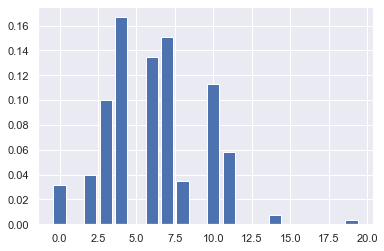

In [119]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_cat, y_train, X_val_cat)

# what are the scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (X_train_cat.columns[i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


<a class="anchor" id="13th-bullet">

## 5.2.2. Decision Categorical Data
    
<a name="Decision_Categorical"></a>
</a>

| Predictor | Chi-squared | Mutual Information | Decision |
| --- |--- |--- |--- |
| Checkup |  Keep | Keep | Keep |
| Diabetes | Keep | Keep | Keep |
| Fruit_Extremes | Keep | Keep | Keep? |
| Fruit_Habit | Keep | Keep | Keep?|
| Exercise | Keep | Keep | Keep |
| Category_HC | Keep | Keep | Keep |
| Category_BP | Keep | Discard | Try with and Without |
| Female | Keep | Discard | Try with and without |
| Drinking_Habit |Keep | Discard | Try With and Without |
| Smoking_Habit | Discard | Discard | Discard |
| ... | ... | ... | Discard |

Keeping in mind that Fruit_Extremes is near identical to Fruit_Habit and only one can be chosen, after trial and error, through the CV graph of categorical models (section 6.1.2.), the  best selection of features was:

In [67]:
cat_selected=['Category_HC','Fruit_Extremes','Checkup','Diabetes','Exercise','Female', 'Category_BP']
X_train_cat_selected=X_train_cat[cat_selected]
X_val_cat_selected=X_val_cat[cat_selected]

<a class="anchor" id="7th-bullet">

# 5.3. Categorical _AND_ Numerical Data
    
<a name="CATNUM"></a>
</a>

<a class="anchor" id="7th-bullet">

## 5.3.1. Feature Importance
    
<a name="imp"></a>
</a>

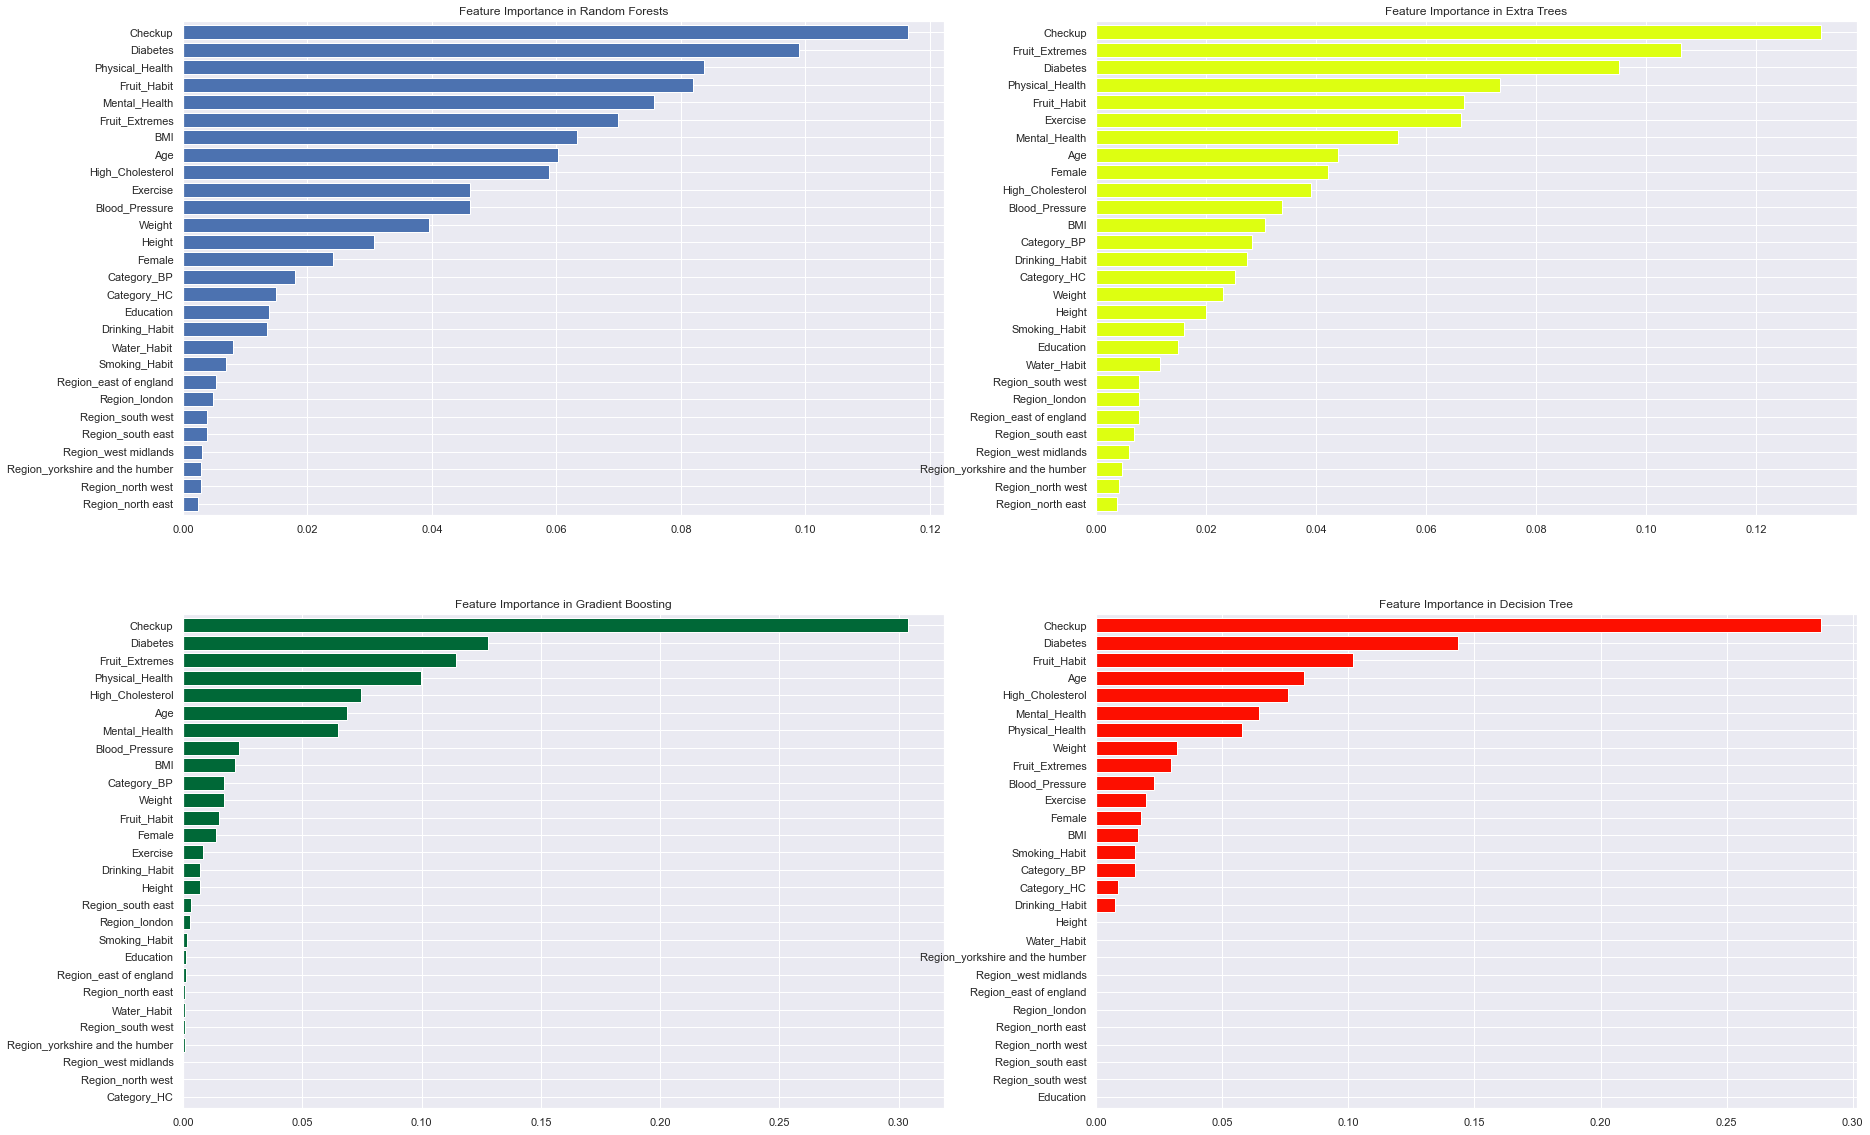

In [68]:
X=X_train
y=y_train
f,ax=plt.subplots(2,2,figsize=(30,20))
model=RandomForestClassifier(n_estimators=500)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=ExtraTreesClassifier()
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in Extra Trees')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.5)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=DecisionTreeClassifier()
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in Decision Tree')
plt.show()

<a class="anchor" id="7th-bullet">

### 5.3.2. Variables Ranking
    
<a name="5.3.2"></a>
</a>

| Predictor | Random Forest | Adaboost | Gradient Boosting | Decision Trees | Average Rank |
| --- | --- |--- |--- |--- |--- |
| Diabetes | 2 | 2 | 2 | 2 | 2 |
| Checkup | 1 | 6 | 1 | 1 | 2.25 |
| Physical_Health | 3 | 1 | 3 | 8 | 3.75 |
| High_Cholosterol | 9 | 3 | 5 | 3 | 5 |
| Fruit_Extremes | 6 | 7 | 4 | 4 | 5.25 |
| Mental Health | 5 | 5 | 7 | 7 | 6 |
| Fruit_Habit | 4 | 8 | 8 | 6 | 6.5 |
| Age | 7 | 12 | 6 | 5 | 7.5 |
| Female | 14 | 4 | 10 | 10 | 9.5 |
| Blood_Pressure | 10 | 9 | 11 | 9 | 9.75 |
| IMC | 8 | 13 | 9 | 14 | 11 |
| Exercise | 11 | 11 | 12 | 12 | 11.5 |
| Weight | 12 | 17 | 13 | 11 | 13.25 |
| Height | 13 | 14 | 15 | 15 | 14.25 |
| Drinking_Habit | 16 | 10 | 14 | 18 | 14.5 |
| ... | ... | ... | ... | ... | Discard |

Gereally Important Feautures: Diabetes, Checkup, Physical_Health, High_Cholosterol, Fruit_Extremes, Mental_Health, Fruit_Habit
Features with some Importance: Age, Female, Blood_Pressure, BMI, Exercise
features important sometimes: Weight, Height, Drinking_Habit

After trial and error, through the CV graph of numerical and categorical models (section 6.1.3.), the  best selection of features was:

In [69]:
Cat_and_num_selected=['Checkup','Fruit_Extremes','Diabetes','Physical_Health', 'Age', 'Mental_Health', 'High_Cholesterol', 
                      'BMI', 'Blood_Pressure','Exercise', 'Female']
X_train=X_train[Cat_and_num_selected] 
X_val=X_val[Cat_and_num_selected] 

Comparing the features selected in this section with the features of the previous sections, which are show-cased here:

cat_selected= 'Category_HC', 'Fruit_Extremes', 'Checkup', 'Diabetes', 'Exercise', 'Female', 'Category_BP'

num_selected= 'Height', 'Mental_Health', 'Physical_Health', 'Blood_Pressure', 'High_Cholesterol', 'BMI', 'Age'

We can conclude that there is not much of a difference regarding the features chosen, with exception to the height feature, which is not very relevant according to the features' importance. Also, the discrete values of Blood Pressure and High_Cholesterol are more important than their corresponding binning.

<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## 6. Models
    
<a name="Models"></a>
</a>
    

Each Section Begins with a plot of the accuracy of the cross-validation of the applicable methods, which are divided in three sub-sections which are the models applicable for the numeric data, the models applicable to the categorical data, and the models applicable to both. 

After this, the best performing ones are chosen and improved on, by applying GridSearchCV to each model in order to find the optimal hyperparameters and get the best performance for the model, not forgetting that we want a model applicable to the test data, not the training, so we performed 7-fold Cross-Validation when choosing the parameters (expept for GradientBoostingClassifier, which performed 5-fold Cross-Validation to save time).

The results_table() function will be used to check the performance of the model through the metrics mse, accuracy, precision, f1-score and recall. It will also check for Overfiiting through the Cross-Validation scores, the bias and Variance, and robustness through the jitter method.

The cells that perform gridSearchCV have been turned into comments in order to run the notebook faster.

In [70]:
#metrics

def results_table(model_name, model, y_pred, y_val, X_train):
    metrics = []
    CV_scores = cross_val_score(model, X_train, y_train, cv=kfold)
    metrics.append(min(CV_scores))
    metrics.append(max(CV_scores))
    metrics.append((CV_scores.mean()))
    
    metrics.append(accuracy_score(y_val, y_pred))
    metrics.append(precision_score(y_val, y_pred))
    metrics.append(recall_score(y_val, y_pred))
    metrics.append(f1_score(y_val, y_pred))
    
    
    metrics_df.loc[model_name] = metrics

In [71]:
# Robustness
def jitter(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter_test(classifier, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y, classifier.predict(jitter(X, s)))
        out.append(avg / N)
    return out, scales

<a class="anchor" id="13th-bullet">

## 6.1. Preliminary Model Analysis
    
<a name="6.1."></a>
</a>

<a class="anchor" id="13th-bullet">

### 6.1.1. Numerical Models
    
<a name="6.1.1."></a>
</a>

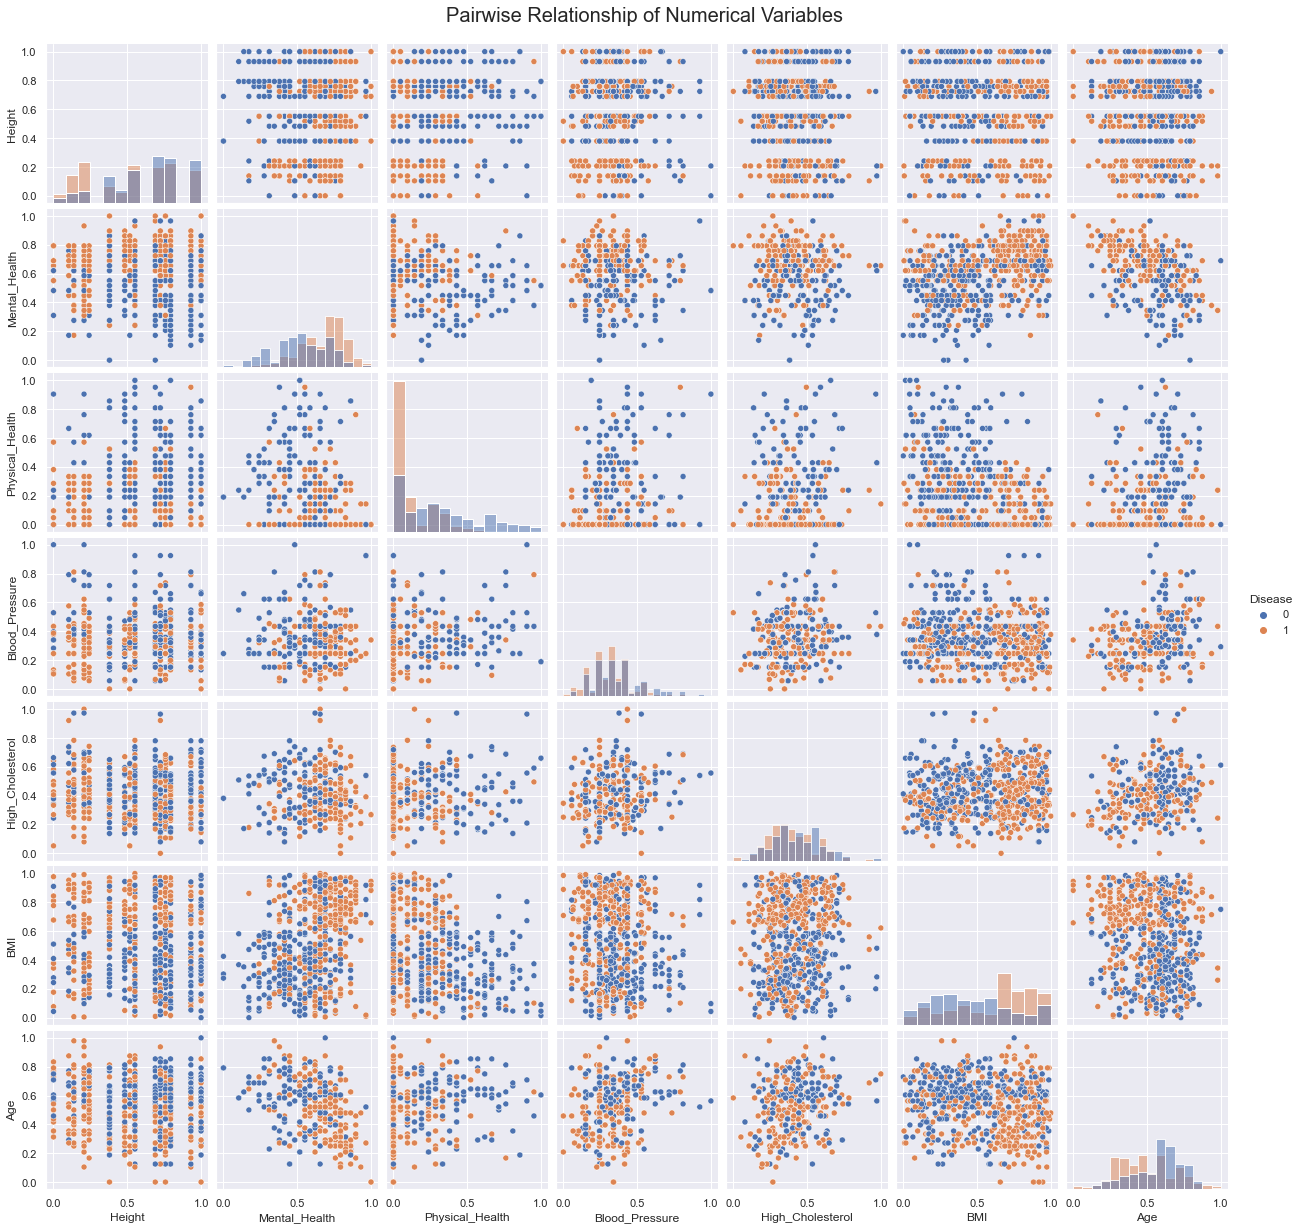

In [72]:
num_all_selected = X_train_num_selected.join(y_train)

# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(num_all_selected, diag_kind="hist", hue='Disease')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

There seems to be some distinction between the 2 outputs, but there isn't a clear seperation.

<AxesSubplot:>

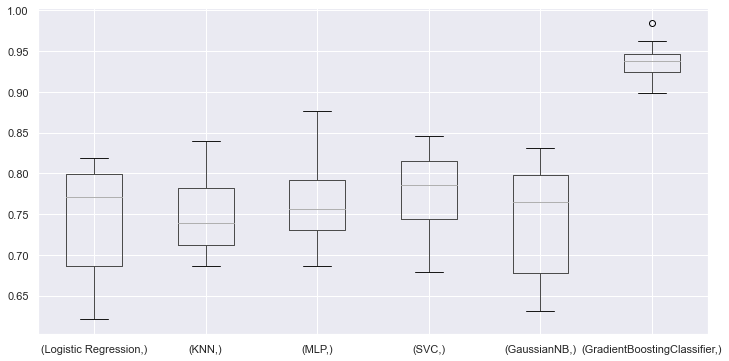

In [73]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','MLP', 'SVC', 'GaussianNB', 'GradientBoostingClassifier']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=11),
        MLPClassifier(max_iter=600), svm.SVC(C=100),
        GaussianNB(), GradientBoostingClassifier(learning_rate=0.50, max_depth=5,n_estimators=250)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train_num_selected,y_train, cv = kfold,scoring = "f1")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe1=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)      

plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

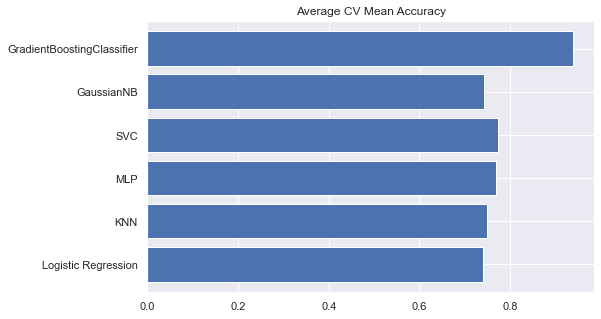

In [74]:
new_models_dataframe1['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The best Methods are Gradient Boosting Classifier, Gaussian Naive Bayes, SVC, and KNN.

<a class="anchor" id="13th-bullet">

### 6.1.2. Categorical Models
    
<a name="6.1.2."></a>
</a>

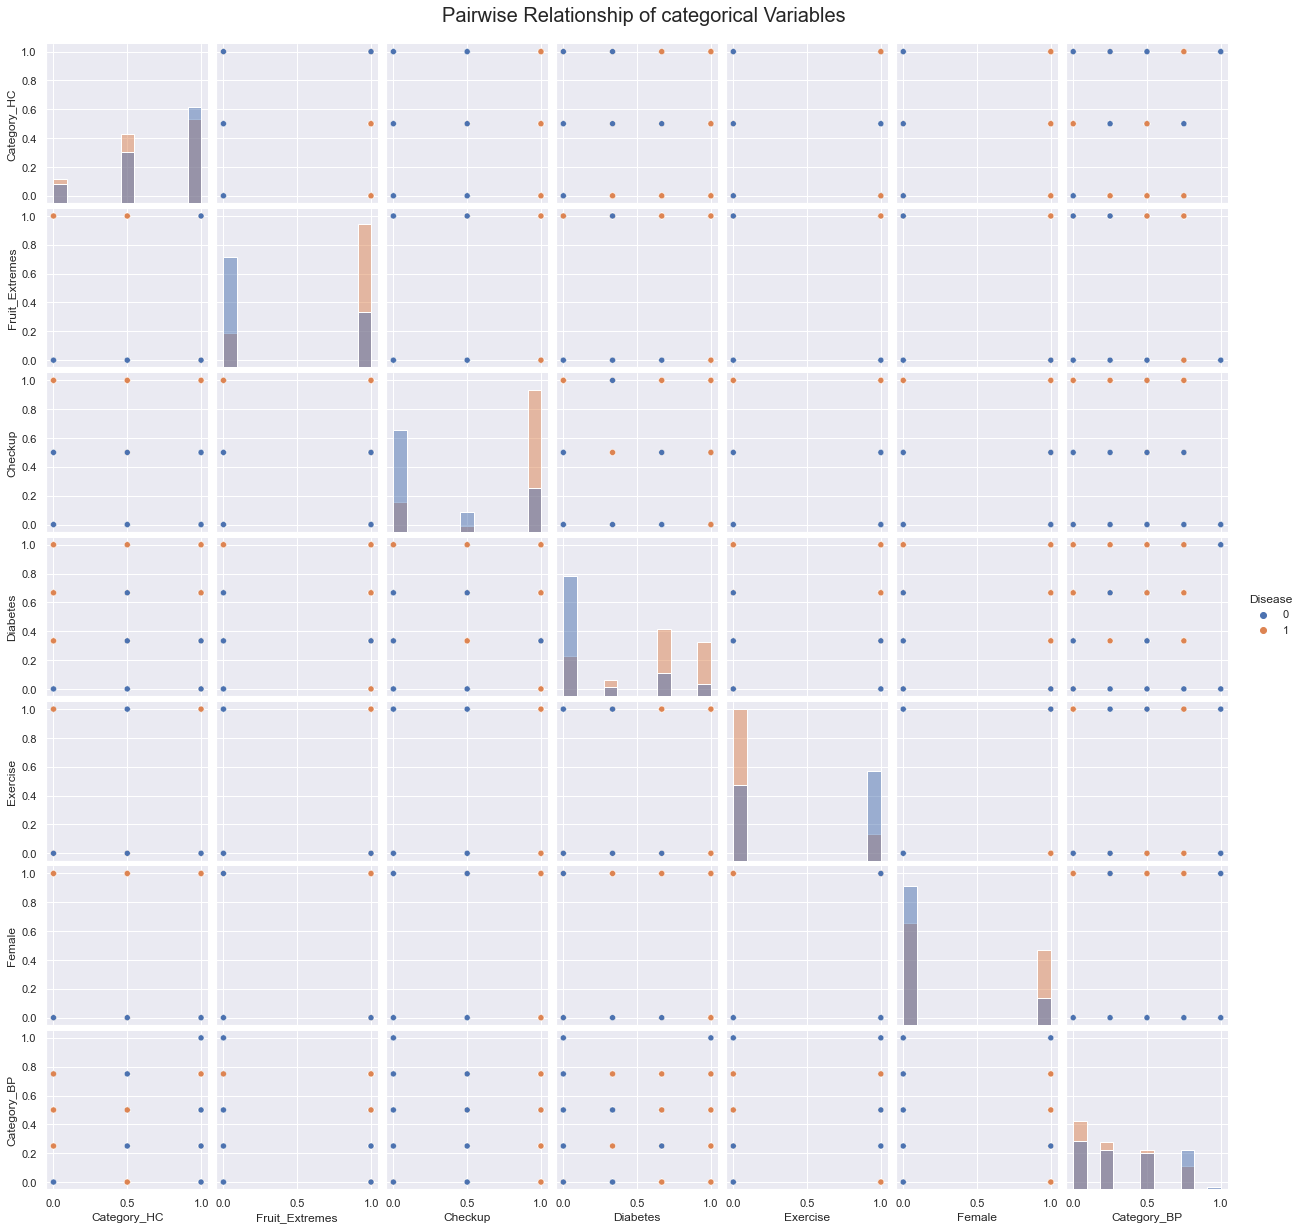

In [75]:
all_cat_selected = X_train_cat_selected.join(y_train)

# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(all_cat_selected, diag_kind="hist", hue='Disease')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of categorical Variables", fontsize=20)

plt.show()

<AxesSubplot:>

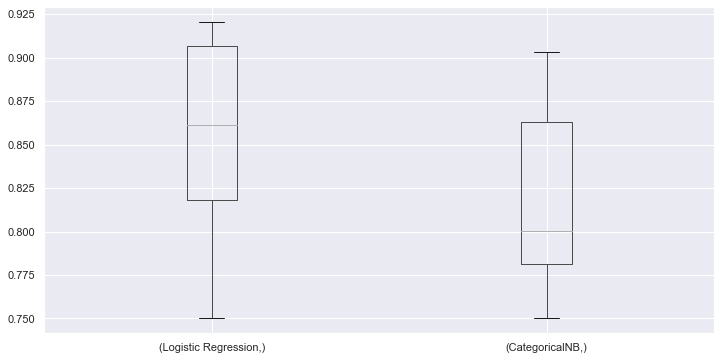

In [76]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','CategoricalNB']
models=[LogisticRegression(),CategoricalNB()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train_cat_selected,y_train, cv = kfold,scoring = "f1")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)      

plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

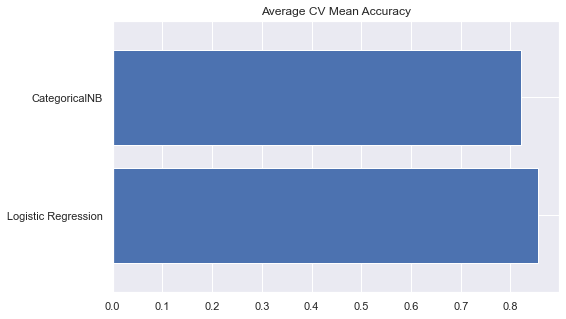

In [77]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<a class="anchor" id="13th-bullet">

### 6.1.3. Numerical AND Categorical Models
    
<a name="6.1.3."></a>
</a>

<AxesSubplot:>

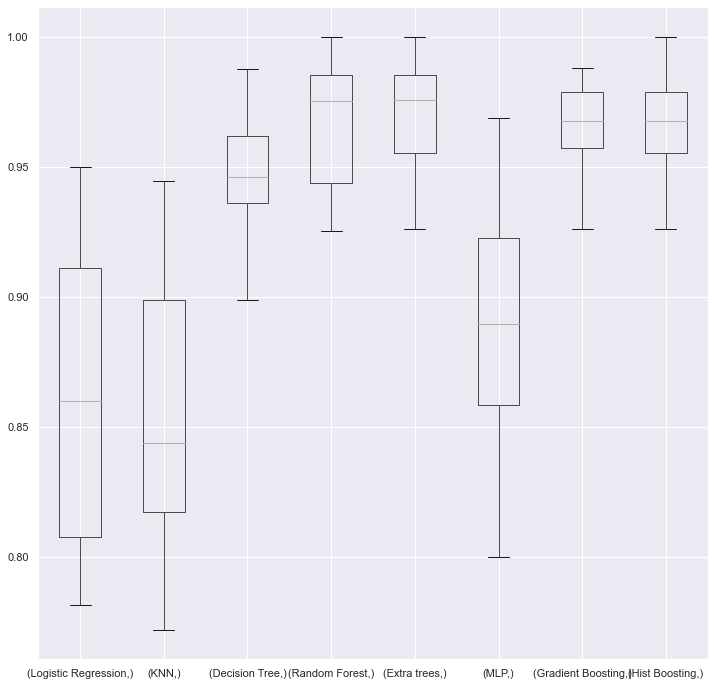

In [120]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest', 'Extra trees', 'MLP', 'Gradient Boosting','Hist Boosting']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=11),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100), 
        ExtraTreesClassifier(), MLPClassifier(max_iter=600), GradientBoostingClassifier(learning_rate=0.50, max_depth=5,n_estimators=250),
        HistGradientBoostingClassifier(random_state=15)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "f1")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe3=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)      

plt.subplots(figsize=(12,12))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

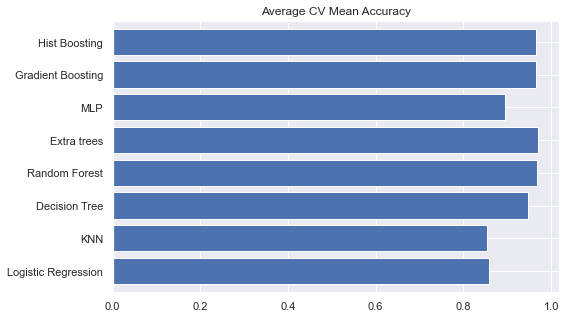

In [79]:
new_models_dataframe3['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### The Methods chosen to be further explored are DecisionTreeClassifier,  RandomForestClassifier,  ExtraTreesClassifier, GradientBoosting Classifer, and HistGradientBoostingClassifier.
-----

<a class="anchor" id="13th-bullet">

## 6.2. Building and Improvement of Models
    
<a name="6.2."></a>
</a>

In [80]:
def calculate_F1(interval, key): #plots the f1 score a specified range for certain numeric parameters and for different methods
    skf = StratifiedKFold(n_splits=10)
    train_results = []
    avg_train_results = []
    test_results = []
    avg_test_results = []
    X=train_df[Cat_and_num_selected]
    
    for value in interval:
        for train_index, test_index in skf.split(X,Y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
            if key == 1:
                model = DecisionTreeClassifier(max_depth = value)
            elif key ==2:
                model = DecisionTreeClassifier(min_samples_leaf=value )
            elif key ==3:
                model = DecisionTreeClassifier(min_samples_split=value )
            elif key ==4:
                model = DecisionTreeClassifier(max_features=value )
            elif key ==4.5:
                model = DecisionTreeClassifier(random_state=value )
            elif key ==4.8:
                model = DecisionTreeClassifier(max_leaf_nodes=value )
            elif key ==4.9:
                model = DecisionTreeClassifier(ccp_alpha=value )
            elif key ==5:
                model = RandomForestClassifier(max_depth = value)
            elif key ==6:
                model = RandomForestClassifier( n_estimators=value)
            elif key ==7:
                model = RandomForestClassifier(max_features=value)
            elif key ==8:
                model = RandomForestClassifier(min_samples_split=value)
            elif key ==9:
                model = RandomForestClassifier(min_samples_leaf=value)
            elif key ==9.5:
                model = RandomForestClassifier(ccp_alpha=value)
            elif key ==9.8:
                model = RandomForestClassifier(max_leaf_nodes=value)
            elif key ==9.9:
                model = RandomForestClassifier(random_state=value)
            elif key ==10:
                model = ExtraTreesClassifier(max_depth=value)
            elif key ==11:
                model = ExtraTreesClassifier(max_features=value )
            elif key ==12:
                model = ExtraTreesClassifier(n_estimators=value)
            elif key ==12.2:
                model = ExtraTreesClassifier(min_samples_split=value)
            elif key ==12.4:
                model = ExtraTreesClassifier(min_samples_leaf=value)
            elif key ==12.6:
                model = ExtraTreesClassifier(max_leaf_nodes=value)
            elif key ==12.8:
                model = ExtraTreesClassifier(ccp_alpha=value)
            elif key ==13:
                model = HistGradientBoostingClassifier(max_iter=value )
            elif key ==14:
                model = HistGradientBoostingClassifier(max_depth=value )
            elif key ==15:
                model = HistGradientBoostingClassifier(min_samples_leaf=value )
            elif key ==16:
                model = HistGradientBoostingClassifier(learning_rate=value )
            elif key ==17:
                model = GradientBoostingClassifier(n_estimators=value )
            
            model.fit(X_train, y_train)
            train_pred = model.predict(X_train)
            f1_train = f1_score(y_train, train_pred)
            train_results.append(f1_train)
            val_pred = model.predict(X_test)
            f1_val = f1_score(y_test, val_pred)
            test_results.append(f1_val)
        avg_train_results.append(round(np.mean(train_results),3))
        avg_test_results.append(round(np.mean(test_results),3))
    
    print('The best f1 score for train is ' + str(max(avg_train_results)) + ' for the depth of ' + str(avg_train_results.index(max(avg_train_results))+1))
    print('The best f1 score for test is ' + str(max(avg_test_results)) + ' for the depth of ' + str(avg_test_results.index(max(avg_test_results))+1))
        
    plt.figure(figsize=(12.5, 12.5))
    plt.plot(interval, avg_train_results, label = "Train F1")
    plt.plot(interval, avg_test_results, label = "Test F1")
    
    plt.xticks(interval)
    if key ==1:
        plt.title('Max_depth Decision Tree')
    elif key == 2:
        plt.title('min_samples_leaf Decision Tree')
    elif key == 3:
        plt.title('min_samples_split Decision Tree')
    elif key == 4:
        plt.title('max_features Decision Tree')
    elif key == 4.8:
        plt.title('max_leaf_nodes Decision Tree')
    elif key == 4.9:
        plt.title('ccp_alpha Decision Tree')
    elif key == 5:
        plt.title('max_depth Random Forest')
    elif key == 6:
        plt.title('n_estimators Random Forest')
    elif key == 7:
        plt.title('max_features Random Forest')
    elif key == 8:
        plt.title('min_samples_split Random Forest')
    elif key == 9:
        plt.title('min_samples_leaf Random Forest')
    elif key == 10:
        plt.title('max_depth Extra Trees')
    elif key == 11:
        plt.title('max_features Extra Trees')
    elif key == 12:
        plt.title('n_estimators Extra Trees')
    elif key == 13:
        plt.title('Max_iter Histogram Boosting')
    elif key == 14:
        plt.title('Max_depth Histogram Boosting')
    elif key == 15:
        plt.title('Min_samples_leaf Histogram Boosting')
    elif key == 16:
        plt.title('Learning_rate Histogram Boosting')
    plt.legend()
    plt.ylabel("F1 score")
    plt.show()

The variation of the f1-score depending on all the numeric parameters were looked into for all models. The variation was checked by applying a range of intervals to the parameter under evaluation, while the other parameters are set to the default.  If the same variation was repeated on a different model it was deleted.

<a class="anchor" id="13th-bullet">

### 6.2.1. Decision Tree
   
<a name="6.2.1."></a>
</a>

A high max_depth is usually correlated with a high performance in the training, but lower on the test as it increases the risk of overfitting.


The best f1 score for train is 0.972 for the depth of 30
The best f1 score for test is 0.932 for the depth of 30


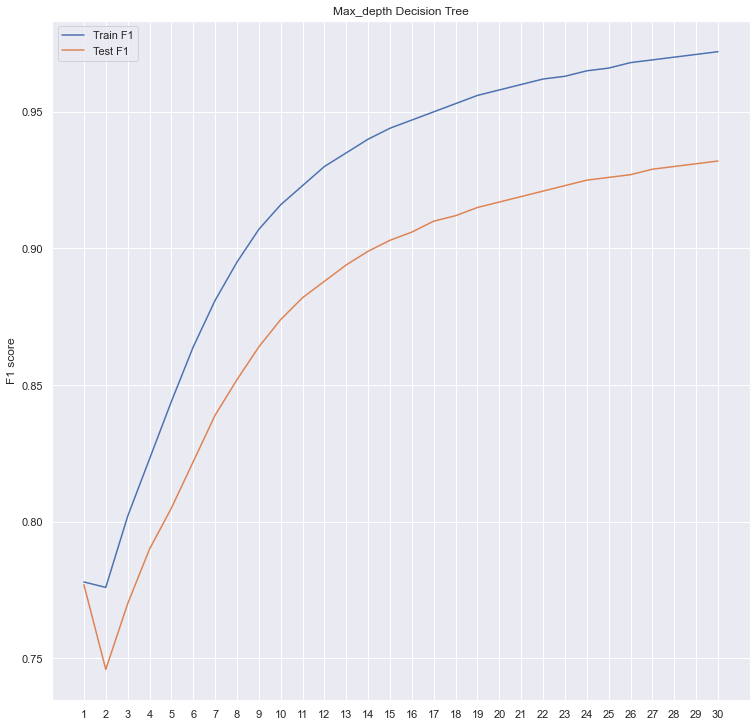

In [81]:
calculate_F1(np.arange(1,31), 1) #MAX DEPTH DT

There does not seem to be overfitting for values above 20, as both f1-scores continuously increase, but the higher the values the lower the robustness of the model.
There is a clear case of underfitting for max_depth of 2, so the range chosen to use in the gridsearchCV is [3,20].

The best f1 score for train is 1.0 for the depth of 1
The best f1 score for test is 0.961 for the depth of 1


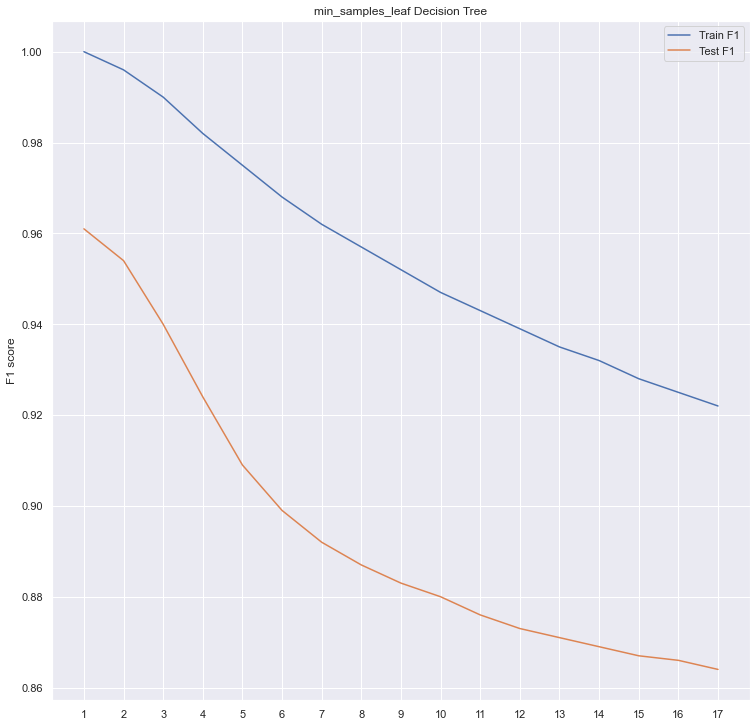

In [82]:
calculate_F1(np.arange(1,18),2) # MIN SAMPLES LEAF DT

The f1-scores get progressively worse, but the first values don't differ too much from the 1st result, so the range chosen is [1,4].

The best f1 score for train is 1.0 for the depth of 1
The best f1 score for test is 0.96 for the depth of 2


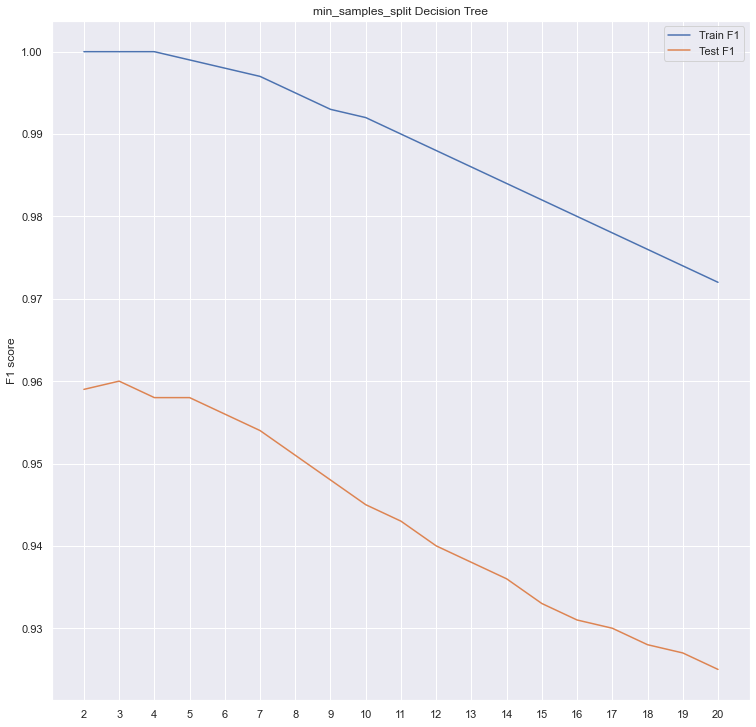

In [83]:
calculate_F1(np.arange(2,21), 3) #MIN SAMPLES SPLIT DT

For the same reason as above the range chosen is [2,6].

The best f1 score for train is 1.0 for the depth of 1
The best f1 score for test is 0.961 for the depth of 9


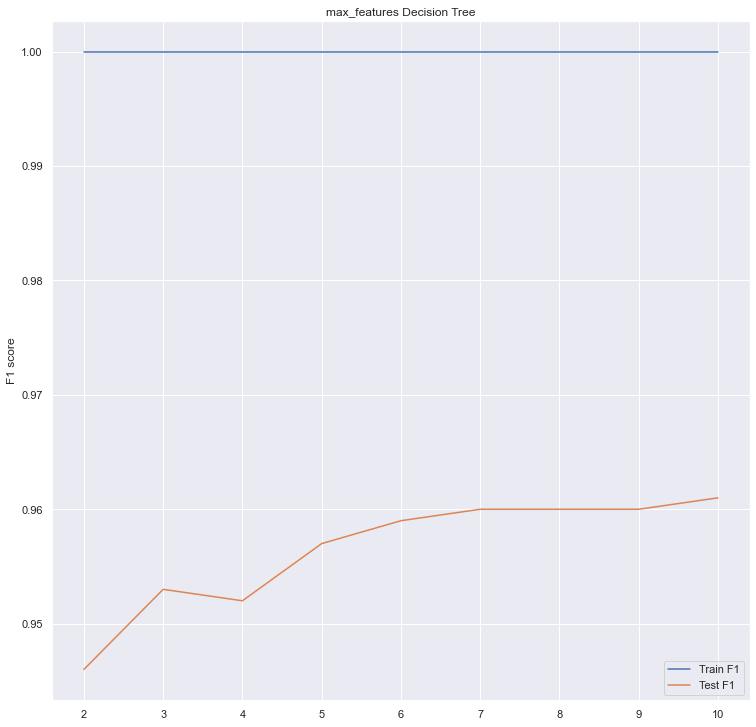

In [84]:
calculate_F1(np.arange(2,11), 4) #MAX FEATURES DT

Due to the small variation of the score all values will be included.

The best f1 score for train is 0.962 for the depth of 22
The best f1 score for test is 0.921 for the depth of 22


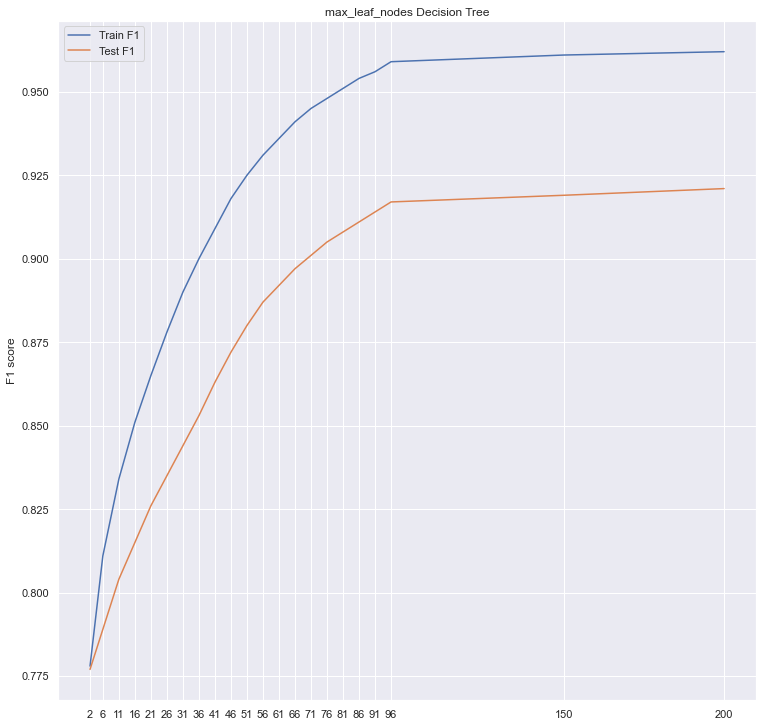

In [85]:
calculate_F1([ 2, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56,61,66,71,76,81,86,91,96, 150, 200], 4.8) #Max leaf DT

As the f1-score continuosly increases no max_leaf_nodes will be chosen.

The best f1 score for train is 1.0 for the depth of 1
The best f1 score for test is 0.959 for the depth of 1


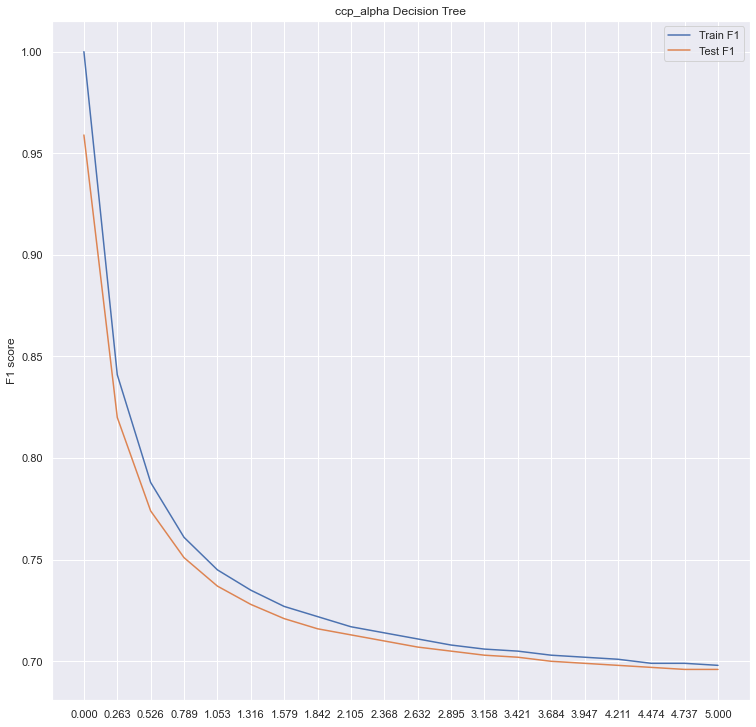

In [86]:
calculate_F1(np.linspace(0,5,20), 4.9) #alpha DT

The f1-score continuosly decreases so the value will be set to the default, 0.

In [87]:
'''params = {'criterion' : ('gini', 'entropy'), 
          'splitter' : ('best', 'random'),
          'max_depth' : range(3,20),
          'max_features': [3,4,5,6,7,8,9,10,11, None],
                    'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split': [2, 3, 4, 5, 6]
         }

modelDT = GridSearchCV(DecisionTreeClassifier(), params, verbose = 2, n_jobs = -1, scoring='f1', cv = 7)
modelDT = modelDT.fit(X_train, y_train)
print(modelDT.best_score_)
print(modelDT.best_estimator_)
DT_param=modelDT.best_estimator_
y_DT_all=modelDT.predict(X_val)'''

"params = {'criterion' : ('gini', 'entropy'), \n          'splitter' : ('best', 'random'),\n          'max_depth' : range(3,20),\n          'max_features': [3,4,5,6,7,8,9,10,11, None],\n                    'min_samples_leaf': [1, 2, 3, 4],\n          'min_samples_split': [2, 3, 4, 5, 6]\n         }\n\nmodelDT = GridSearchCV(DecisionTreeClassifier(), params, verbose = 2, n_jobs = -1, scoring='f1', cv = 7)\nmodelDT = modelDT.fit(X_train, y_train)\nprint(modelDT.best_score_)\nprint(modelDT.best_estimator_)\nDT_param=modelDT.best_estimator_\ny_DT_all=modelDT.predict(X_val)"

In [88]:
modelDT = DecisionTreeClassifier(max_depth=15, max_features=6, splitter='random').fit(X_train, y_train)
y_DT_all=modelDT.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Decision Tree', modelDT, y_DT_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Decision Tree,0.888889,0.984127,0.948925,0.942675,0.95,0.938272,0.944099


In [89]:
print('The defined three has a depth of ' + str(modelDT.get_depth()) + ', ' + str(modelDT.tree_.node_count) + 
      ' nodes and a total of ' + str(modelDT.get_n_leaves()) + ' leaves.')

The defined three has a depth of 10, 195 nodes and a total of 98 leaves.


<a class="anchor" id="13th-bullet">

### 6.2.2. Random Forest
   
<a name="6.2.2."></a>
</a>

The best f1 score for train is 1.0 for the depth of 1
The best f1 score for test is 0.989 for the depth of 1


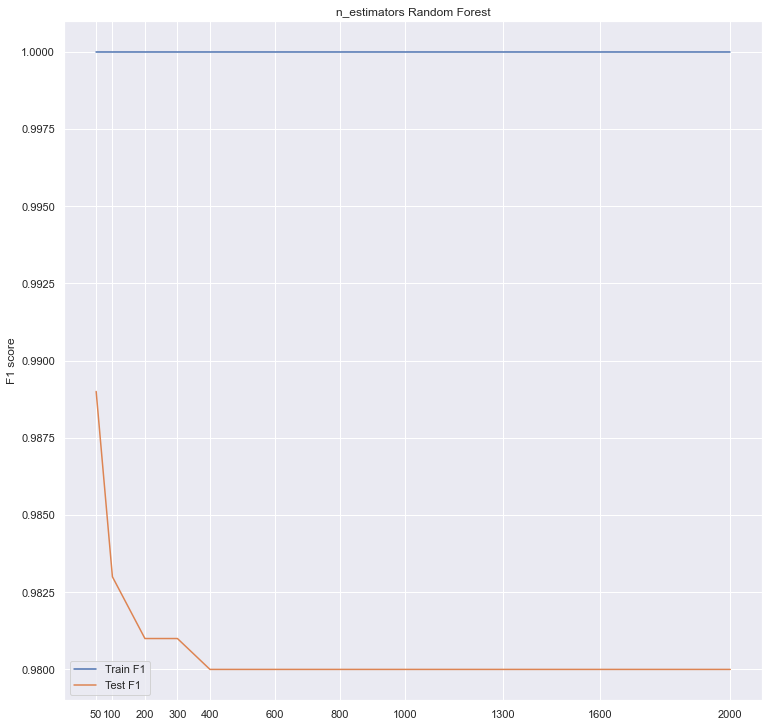

In [90]:
calculate_F1([50, 100, 200, 300, 400, 600, 800, 1000, 1300, 1600, 2000],6) # MAX FEATURES RF

The test f1-score seems to be better for higher umber of estimators, which should also increase the model's robustess.
Despite this, sice the higher the n_estimators the more time the model takes to train, a value of 400 was chosen for the CrossValidationCV to not take too long.


In [91]:
'''params = {'criterion' : ('gini', 'entropy'),
          'max_depth' : range(3,20),
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split': [2, 3, 4, 5, 6],
          'max_features': [3,4,5,6,7,8,9,10,11, None],
          'n_estimators': [400],
        }

modelRF = GridSearchCV(RandomForestClassifier(), params, verbose = 2, n_jobs = -1, scoring='accuracy', cv = 7)
modelRF = modelRF.fit(X_train, y_train)
print(modelRF.best_score_)
print(modelRF.best_estimator_)
rf_parm=modelRF.best_estimator_
y_RF_all=modelRF.predict(X_val)'''

"params = {'criterion' : ('gini', 'entropy'),\n          'max_depth' : range(3,20),\n          'min_samples_leaf': [1, 2, 3, 4],\n          'min_samples_split': [2, 3, 4, 5, 6],\n          'max_features': [3,4,5,6,7,8,9,10,11, None],\n          'n_estimators': [400],\n        }\n\nmodelRF = GridSearchCV(RandomForestClassifier(), params, verbose = 2, n_jobs = -1, scoring='accuracy', cv = 7)\nmodelRF = modelRF.fit(X_train, y_train)\nprint(modelRF.best_score_)\nprint(modelRF.best_estimator_)\nrf_parm=modelRF.best_estimator_\ny_RF_all=modelRF.predict(X_val)"

In [92]:
modelRF = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=6,
                       min_samples_split=3, n_estimators=400).fit(X_train, y_train)
y_RF_all=modelRF.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Random Forest', modelRF, y_RF_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Random Forest,0.936508,1.0,0.964926,0.987261,0.987654,0.987654,0.987654


<a class="anchor" id="13th-bullet">

### 6.2.3. Extratrees
    
<a name="6.2.3."></a>
</a>

The best f1 score for train is 1.0 for the depth of 1
The best f1 score for test is 0.989 for the depth of 1


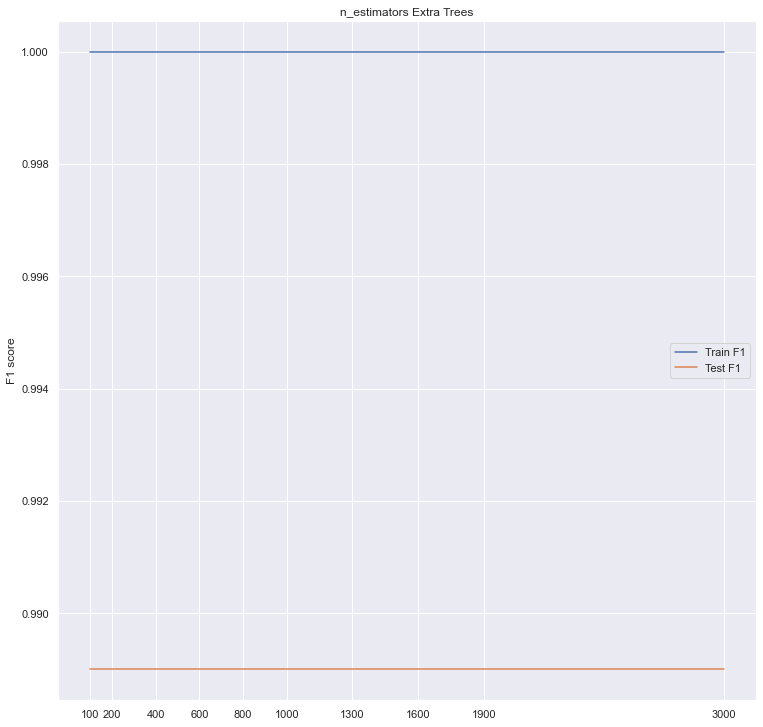

In [93]:
calculate_F1([100,200,400,600,800,1000,1300,1600,1900,3000],12) #N ESTIMATORS EXTRA

The score varies very little, so a value of 400 was chosen keeping in mind the robustness and computational power.

In [94]:
'''params = {'criterion' : ('gini', 'entropy'),
          'max_depth' : range(3,20),
          'n_estimators': [400],
          'max_features': [3,4,5,6,7,8,9,10,11,  None],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split': [2, 3, 4, 5, 6]
        }

modelextra = GridSearchCV(ExtraTreesClassifier(), params, verbose = 2, n_jobs = -1, scoring='f1', cv = 7)
modelextra = modelextra.fit(X_train, y_train)
print(modelextra.best_score_)
print(modelextra.best_estimator_)
extra_param=modelextra.best_estimator_
y_extra_all=modelextra.predict(X_val)'''

"params = {'criterion' : ('gini', 'entropy'),\n          'max_depth' : range(3,20),\n          'n_estimators': [400],\n          'max_features': [3,4,5,6,7,8,9,10,11,  None],\n          'min_samples_leaf': [1, 2, 3, 4],\n          'min_samples_split': [2, 3, 4, 5, 6]\n        }\n\nmodelextra = GridSearchCV(ExtraTreesClassifier(), params, verbose = 2, n_jobs = -1, scoring='f1', cv = 7)\nmodelextra = modelextra.fit(X_train, y_train)\nprint(modelextra.best_score_)\nprint(modelextra.best_estimator_)\nextra_param=modelextra.best_estimator_\ny_extra_all=modelextra.predict(X_val)"

In [95]:
modelextra = ExtraTreesClassifier(criterion='entropy', max_depth=14, max_features=4,
                     n_estimators=400).fit(X_train, y_train)
y_extra_all=modelextra.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Extra trees Classifier', modelextra, y_extra_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Extra trees Classifier,0.936508,1.0,0.971275,1.0,1.0,1.0,1.0


<a class="anchor" id="13th-bullet">

### 6.2.4. Histogram Boosting
    
<a name="6.2.4."></a>
</a>

The best f1 score for train is 0.974 for the depth of 10
The best f1 score for test is 0.938 for the depth of 10


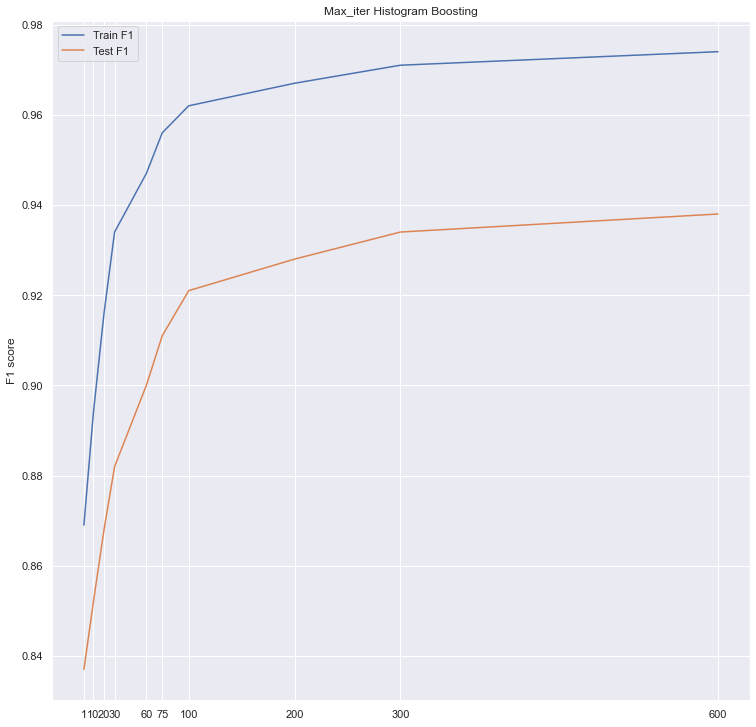

In [96]:
calculate_F1([1,10,20,30,60,75, 100, 200, 300, 600],13) # MAX ITER HIST

The value chosen was 200 keeping in mind computational power and the score.

The best f1 score for train is 0.98 for the depth of 4
The best f1 score for test is 0.952 for the depth of 4


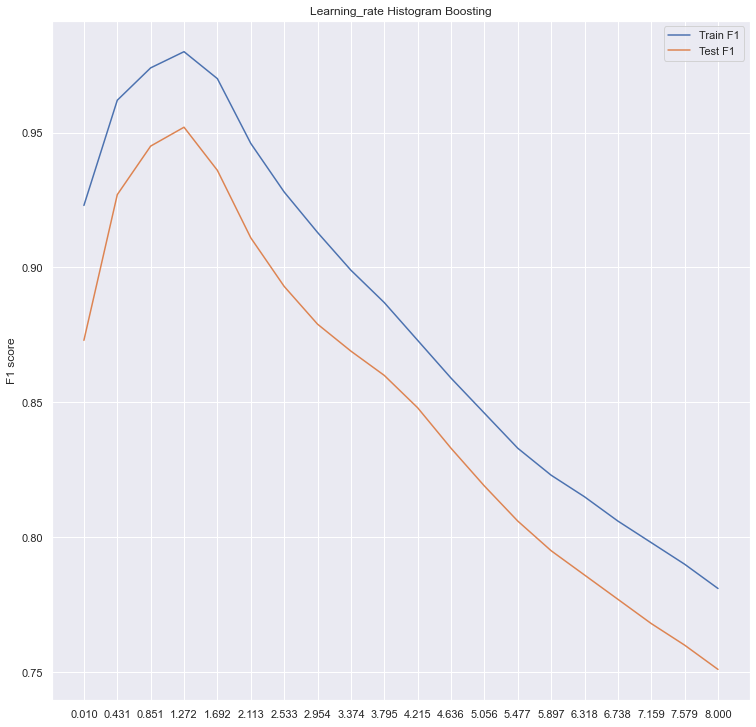

In [97]:
calculate_F1(np.linspace(0.01,8,20),16) # LEARNING RATE HIST

The range chosen is np.linspace(0.7,1.3,40) in order to find the maximum.

In [98]:
'''grid_params = {'learning_rate' : np.linspace(0.7,1.3,40),
               'max_iter': [200],
               'max_depth': range(3,20),
               'min_samples_leaf': [1, 2, 3, 4]          
               }

modelhist = GridSearchCV(HistGradientBoostingClassifier(), grid_params, verbose = 1, scoring='f1', cv = 7, n_jobs = -1)
modelhist = modelhist.fit(X_train, y_train)
print(modelhist.best_score_)
print(modelhist.best_estimator_)
hist_param=modelhist.best_estimator_
y_hist_all=modelhist.predict(X_val)'''

"grid_params = {'learning_rate' : np.linspace(0.7,1.3,40),\n               'max_iter': [200],\n               'max_depth': range(3,20),\n               'min_samples_leaf': [1, 2, 3, 4]          \n               }\n\nmodelhist = GridSearchCV(HistGradientBoostingClassifier(), grid_params, verbose = 1, scoring='f1', cv = 7, n_jobs = -1)\nmodelhist = modelhist.fit(X_train, y_train)\nprint(modelhist.best_score_)\nprint(modelhist.best_estimator_)\nhist_param=modelhist.best_estimator_\ny_hist_all=modelhist.predict(X_val)"

In [99]:
modelhist = HistGradientBoostingClassifier(learning_rate=1.2538461538461538, max_depth=7,
                               max_iter=200, min_samples_leaf=3).fit(X_train, y_train)

y_hist_all=modelhist.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Histogram Boosting', modelhist, y_hist_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Histogram Boosting,0.920635,0.984127,0.955325,0.987261,0.987654,0.987654,0.987654


<a class="anchor" id="13th-bullet">

### 6.2.5. Gradient Boosting
    
<a name="6.2.5."></a>
</a>

In [100]:
'''grid_params = {'learning_rate' : np.linspace(0.7,1.3,15),
               'n_estimators': [200],
               'max_depth': [15],
               'min_samples_leaf': [1,3],
               'max_features': [3,5,7,9,11, None],
               'min_samples_split': [2, 3]    
               }

modelhist = GridSearchCV(GradientBoostingClassifier(), grid_params, verbose = 1, scoring='f1', cv = 5, n_jobs = -1)
modelhist = modelhist.fit(X_train, y_train)
print(modelhist.best_score_)
print(modelhist.best_estimator_)
hist_param=modelhist.best_estimator_
y_hist_all=modelhist.predict(X_val)'''

"grid_params = {'learning_rate' : np.linspace(0.7,1.3,15),\n               'n_estimators': [200],\n               'max_depth': [15],\n               'min_samples_leaf': [1,3],\n               'max_features': [3,5,7,9,11, None],\n               'min_samples_split': [2, 3]    \n               }\n\nmodelhist = GridSearchCV(GradientBoostingClassifier(), grid_params, verbose = 1, scoring='f1', cv = 5, n_jobs = -1)\nmodelhist = modelhist.fit(X_train, y_train)\nprint(modelhist.best_score_)\nprint(modelhist.best_estimator_)\nhist_param=modelhist.best_estimator_\ny_hist_all=modelhist.predict(X_val)"

In [101]:
modelgrad = GradientBoostingClassifier(learning_rate=1.2571428571428571, max_depth=15,
                           min_samples_leaf=3, min_samples_split=3,
                           n_estimators=200).fit(X_train, y_train)

y_grad_all=modelgrad.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Gradient Boosting', modelgrad, y_grad_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Gradient Boosting,0.919355,1.0,0.961623,0.980892,0.97561,0.987654,0.981595


<div class="alert alert-block alert-success">

<a class="anchor" id="7th-bullet">    
    
# 7. Comparison and Model choice
    
<a name="Comparison_Model"></a>
</a>

In order to compare the models we will first Look at the Roc Curve and the AUC.

<a class="anchor" id="13th-bullet">

### 7.1. ROC and AUC
   
<a name="7.1."></a>
</a>

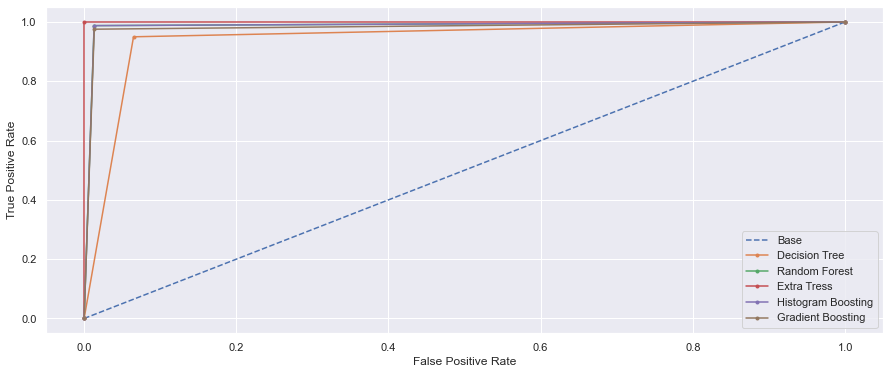

  AUC
0.943:       Decision Tree
0.987:       Random Forest
1.000:          Extra Tree
0.987:  Histogram Boosting
0.981:   Gradient Boosting


In [102]:
# Calculate ROC curves
lr_fpr1, lr_tpr1, _ = roc_curve(y_DT_all, y_val)
lr_fpr6, lr_tpr6, _ = roc_curve(y_RF_all, y_val)
lr_fpr7, lr_tpr7, _ = roc_curve(y_extra_all, y_val)
lr_fpr8, lr_tpr8, _ = roc_curve(y_hist_all, y_val)
lr_fpr9, lr_tpr9, _ = roc_curve(y_grad_all, y_val)

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'Decision Tree')
plt.plot(lr_fpr6, lr_tpr6, marker='.', label = 'Random Forest')
plt.plot(lr_fpr7, lr_tpr7, marker='.', label = 'Extra Tress')
plt.plot(lr_fpr8, lr_tpr8, marker='.', label = 'Histogram Boosting')
plt.plot(lr_fpr9, lr_tpr9, marker='.', label = 'Gradient Boosting')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print scores of Area under curve (AUC)
print('AUC'.rjust(5))
print('{:.3f}: {}'.format(roc_auc_score(y_DT_all, y_val),'Decision Tree'.rjust(19)))
print('{:.3f}: {}'.format(roc_auc_score(y_RF_all, y_val),'Random Forest'.rjust(19)))
print('{:.3f}: {}'.format(roc_auc_score(y_extra_all, y_val),'Extra Tree'.rjust(19)))
print('{:.3f}: {}'.format(roc_auc_score(y_hist_all, y_val),'Histogram Boosting'.rjust(19)))
print('{:.3f}: {}'.format(roc_auc_score(y_grad_all, y_val),'Gradient Boosting'.rjust(19)))

Decision Tree seems to have a slightly worse performance than the other 4 methods, that seem to have similar performances.

In order to confirm our suspicions we will also look into the metrics of the models.

<a class="anchor" id="13th-bullet">

### 7.2. Models' Metrics
    
<a name="7.2."></a>
</a>

In [103]:
metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Random Forest', modelRF, y_RF_all, y_val, X_train)
results_table('Extra trees Classifier', modelextra, y_extra_all, y_val, X_train)
results_table('Histogram Boosting', modelhist, y_hist_all, y_val, X_train)
results_table('Decision Tree', modelDT, y_DT_all, y_val, X_train)
results_table('Gradient Boosting', modelgrad, y_grad_all, y_val, X_train)
metrics_df = metrics_df.sort_values('f1-score',ascending=False)
metrics_df


,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Extra trees Classifier,0.936508,1.000000,0.971249,1.000000,1.000000,1.000000,1.000000
Random Forest,0.936508,1.000000,0.966513,0.987261,0.987654,0.987654,0.987654
Histogram Boosting,0.920635,0.984127,0.955325,0.987261,0.987654,0.987654,0.987654
Gradient Boosting,0.935484,1.000000,0.968049,0.980892,0.975610,0.987654,0.981595
Decision Tree,0.887097,0.984127,0.947312,0.942675,0.950000,0.938272,0.944099


It is clear that the three methods outperform Decision Tree in every metric, while having slightly different performances between them.
We can also check that the cross-validation scores are very high, which means that the model did not overfit for our training data, which is also shown by the low bias score. Through the CV score we can also tell that there was no underfit.

<a class="anchor" id="13th-bullet">

### 7.3. Models' Robustness
    
<a name="7.3."></a>
</a>

In order to further analyse the model's we will also look into their robustness.

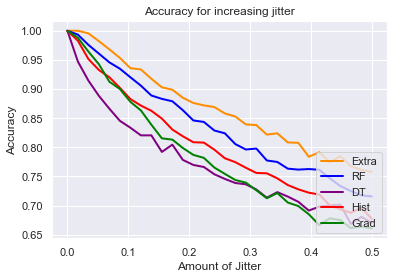

In [104]:
mdl1 = modelextra
mdl2 = modelRF
mdl3 = modelDT;
mdl4 = modelhist
mdl5= modelgrad

mdl1_scores, jitters = jitter_test(mdl1, X_train, y_train)
mdl2_scores, jitters = jitter_test(mdl2, X_train, y_train)
mdl3_scores, jitters = jitter_test(mdl3, X_train, y_train)
mdl4_scores, jitters = jitter_test(mdl4, X_train, y_train)
mdl5_scores, jitters = jitter_test(mdl5, X_train, y_train)
plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='Extra')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='RF')
plt.plot(jitters, mdl3_scores, color='purple',
         lw=lw, label='DT')
plt.plot(jitters, mdl4_scores, color='red',
         lw=lw, label='Hist')
plt.plot(jitters, mdl5_scores, color='green',
         lw=lw, label='Grad')

plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

We can see that Extra Trees Classifier is the most robust method, followed by Random Forest.

<a class="anchor" id="13th-bullet">

### 7.4. Voting and Stacking Classifiers
    
<a name="7.4."></a>
</a>

Although we have reached a model with a validation f1-score of 1 we decided to try using the other models to create a model with the same f1-score but more robust.

The models have high performance, meeting one of the criteria to apply Voting and Stacking Classifiers.
We will now see if they meet the second criteria, as they must also not have high correlation between them. Since the performance of the models that we tuned the parameters is so high, it is likely that the correlation is high as well, since there is not much information that can be new. We added the KNN and the Logistic Regression to our possible models for Voting and Stacking to have models with smaller levels of performance.

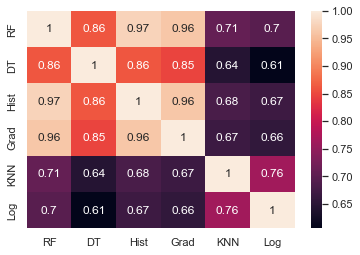

In [105]:
test_RFC = pd.Series(y_RF_all, name="RF")
test_DT = pd.Series(y_DT_all, name="DT")
test_hist = pd.Series(y_hist_all, name="Hist")
test_grad = pd.Series(y_grad_all, name="Grad")
test_KNN = pd.Series(KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train).predict(X_val), name="KNN")
test_Log = pd.Series(LogisticRegression().fit(X_train, y_train).predict(X_val), name="Log")


# Concatenate all classifier results
ensemble_results = pd.concat([test_RFC,test_DT,test_hist, test_grad, test_KNN, test_Log],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

As expected the models with a very high performance are also very highly correlated. We will use Decision Trees, Gradient Boosting, Logistic Regression and KNN.

-----

<a class="anchor" id="13th-bullet">

### 7.4.1. Voting Classifier
    
<a name="7.4.1."></a>
</a>

In [106]:
modelVT = VotingClassifier(estimators=[('DT',DecisionTreeClassifier()),
                                       ('Grad', GradientBoostingClassifier()),
                                       ('Log',LogisticRegression()),
                                       ('KNN',KNeighborsClassifier(n_neighbors=11))],
                 voting='soft').fit(X_train, y_train)

y_VC_all=modelVT.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Voting mais', modelVT, y_VC_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Voting mais,0.809524,0.983871,0.91385,0.974522,0.975309,0.975309,0.975309


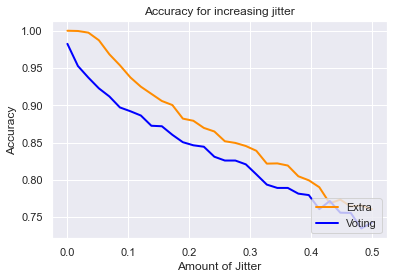

In [107]:
mdl1 = modelextra
mdl2 = modelVT

mdl1_scores, jitters = jitter_test(mdl1, X_train, y_train)
mdl2_scores, jitters = jitter_test(mdl2, X_train, y_train)

plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='Extra')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='Voting')


plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

We weren't able to reach the same score as ExtraTrees and although the model we created a pretty robost model it is still not as robust as the ExtraTrees.

<a class="anchor" id="13th-bullet">

### 7.4.2. Stacking Classifier
    
<a name="7.4.2."></a>
</a>

In [108]:
'''grid_params = {
    'final_estimator' : [LogisticRegression(),SVC(),KNeighborsClassifier(),RandomForestClassifier()],
    'stack_method' : ['auto','predict_proba']
                }

modelSC =GridSearchCV(StackingClassifier(estimators=[('DT',DecisionTreeClassifier()),
                                       ('Grad', GradientBoostingClassifier()),
                                       ('Log',LogisticRegression()),
                                       ('KNN',KNeighborsClassifier(n_neighbors=11))]),
                     grid_params, verbose = 1, scoring='f1', n_jobs = -1, cv = 3)
modelSC = modelSC.fit(X_train, y_train)
print(modelSC.best_score_)
print(modelSC.best_estimator_)
SC_param=modelSC.best_estimator_
y_SC_all=modelSC.predict(X_val)'''

"grid_params = {\n    'final_estimator' : [LogisticRegression(),SVC(),KNeighborsClassifier(),RandomForestClassifier()],\n    'stack_method' : ['auto','predict_proba']\n                }\n\nmodelSC =GridSearchCV(StackingClassifier(estimators=[('DT',DecisionTreeClassifier()),\n                                       ('Grad', GradientBoostingClassifier()),\n                                       ('Log',LogisticRegression()),\n                                       ('KNN',KNeighborsClassifier(n_neighbors=11))]),\n                     grid_params, verbose = 1, scoring='f1', n_jobs = -1, cv = 3)\nmodelSC = modelSC.fit(X_train, y_train)\nprint(modelSC.best_score_)\nprint(modelSC.best_estimator_)\nSC_param=modelSC.best_estimator_\ny_SC_all=modelSC.predict(X_val)"

In [109]:
modelSC = StackingClassifier(estimators=[('DT',DecisionTreeClassifier()),
                                       ('Grad', GradientBoostingClassifier()),
                                       ('Log',LogisticRegression()),
                                       ('KNN',KNeighborsClassifier(n_neighbors=11))],
                   final_estimator=SVC()).fit(X_train, y_train)
y_SC_all=modelSC.predict(X_val)

metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Stacking', modelSC, y_SC_all, y_val, X_train)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Stacking,0.904762,0.984127,0.947286,0.961783,0.962963,0.962963,0.962963


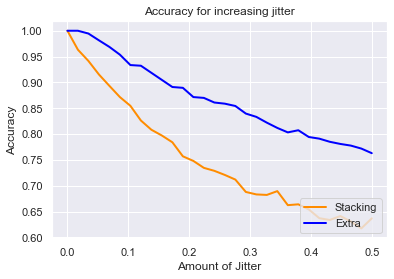

In [110]:
mdl1 = modelSC
mdl2 = modelextra

mdl1_scores, jitters = jitter_test(mdl1, X_train, y_train)
mdl2_scores, jitters = jitter_test(mdl2, X_train, y_train)

plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='Stacking')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='Extra')

plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

We still weren't able to reach the same score as ExtraTrees and this model was much less robust than ExtraTrees

<a class="anchor" id="13th-bullet">

### 7.4.3. Perfomance
    
<a name="7.4.3."></a>
</a>

In order to check if it an improvement was made we will look into the metrics of the 3 original methods, and the 2 new ones, as well as their robustness.

In [111]:
metrics_df = pd.DataFrame(columns=['Min CV', 'Max Cv', 'Mean Cv', 'accuracy', 'precision', 'recall', 'f1-score'])
results_table('Random Forest', modelRF, y_RF_all, y_val, X_train)
results_table('Extra trees', modelextra, y_extra_all, y_val, X_train)
results_table('Histogram Boosting', modelhist, y_hist_all, y_val, X_train)
results_table('Voting', modelVT, y_VC_all, y_val, X_train)
results_table('Stacking', modelSC, y_SC_all, y_val, X_train)
results_table('Decision Tree', modelDT, y_DT_all, y_val, X_train)
metrics_df = metrics_df.sort_values('f1-score',ascending=False)
metrics_df

,Min CV,Max Cv,Mean Cv,accuracy,precision,recall,f1-score
Extra trees,0.936508,1.000000,0.972862,1.000000,1.000000,1.000000,1.000000
Random Forest,0.920635,1.000000,0.964926,0.987261,0.987654,0.987654,0.987654
Histogram Boosting,0.920635,0.984127,0.955325,0.987261,0.987654,0.987654,0.987654
Voting,0.825397,0.967742,0.912238,0.974522,0.975309,0.975309,0.975309
Stacking,0.904762,0.984127,0.947261,0.961783,0.962963,0.962963,0.962963
Decision Tree,0.870968,0.984127,0.947158,0.942675,0.950000,0.938272,0.944099


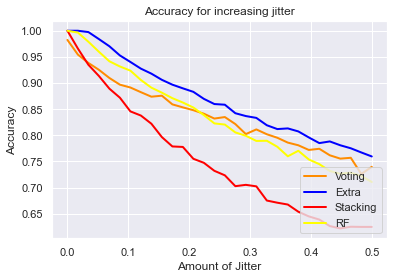

In [112]:
mdl1 = modelVT
mdl2 = modelextra
mdl3 = modelSC
mdl4 = modelRF

mdl1_scores, jitters = jitter_test(mdl1, X_train, y_train)
mdl2_scores, jitters = jitter_test(mdl2, X_train, y_train)
mdl3_scores, jitters = jitter_test(mdl3, X_train, y_train)
mdl4_scores, jitters = jitter_test(mdl4, X_train, y_train)
plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='Voting')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='Extra')
plt.plot(jitters, mdl3_scores, color='red',
         lw=lw, label='Stacking')
plt.plot(jitters, mdl4_scores, color='yellow',
         lw=lw, label='RF')

plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

The robustness of the Voting model was better than that of the old models, but worse than the Extra Trees Classifier model, while the Stacking model did not give good results at all

Since the metrics are also slightly worse than the Extra Trees Classifier model the latter will be the chosen model.

<div class="alert alert-block alert-success">

<a class="anchor" id="7th-bullet">    
    
# 8. Prepare Test Data
    
<a name="Prepare_Test"></a>
</a>

<a class="anchor" id="13th-bullet">

## 8.1. Load Test Data
    
<a name="8.1."></a>
</a>

In [121]:
test_demo = pd.read_excel('test_demo.xlsx',index_col='PatientID')
test_demo.head(2)

,Name,Birth_Year,Region,Education
PatientID,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade)
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years)


In [122]:
test_habits = pd.read_excel('test_habits.xlsx', index_col='PatientID')
test_habits.head(2)

,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,
1343,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1727,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter


In [123]:
test_health = pd.read_excel('test_health.xlsx',index_col='PatientID')
test_health.head(2)

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,
1343,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,171,80,225,130,21,0,Not sure,I do have diabetes


In [124]:
#Merge the three dataframes
test_df= pd.merge(test_demo, test_habits, left_index=True,right_index=True)
test_df= pd.merge(test_df, test_health, left_index=True,right_index=True)
test_df.head(2)

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes


In [125]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(7),

In [126]:
#Check for dupicate rows
test_df.duplicated().sum()

0

<a class="anchor" id="13th-bullet">

## 8.2. Test Data Cleaning
    
<a name="8.2."></a>
</a>

In [127]:
current_time = datetime.datetime.now()
current_year=current_time.year

test_df['Age']= current_year - test_df['Birth_Year']
test_df=test_df.drop(['Birth_Year'], axis=1)

#### Joining categories in the variable Checkup

In [128]:
test_df=test_df.replace(to_replace=["Less than 3 years but more than 1 year", "Less than three months" ], value = 'Less than 3 years')

#### Binning the Variables High Cholesterol and Blood Pressure 

In [129]:
test_df['Category_BP'] = pd.cut(test_df["Blood_Pressure"], bins_bp, labels = bp).astype('object')

In [130]:
test_df['Category_HC'] = pd.cut(test_df["High_Cholesterol"], bins_hc, labels = hc).astype('object')

#### Creating Variable that for the extremes on Fruit Habits

In [131]:
test_df['Fruit_Extremes'] = np.where(test_df['Fruit_Habit'].isin(['Less than 1. I do not consume fruits every day.', 'More than six pieces of fruit ']),1,0)

#### Ranks

In [132]:
test_df["Education"]= test_df["Education"].map({'I never attended school / Other':0, 'Elementary School (1st to 9th grade)':1, 'High School Incomplete (10th to 11th grade)':2, 'High School Graduate':3 , 'University Incomplete (1 to 2 years)':4 , 'University Complete (3 or more years)':5, np.nan : 10})
test_df["Education"]=test_df["Education"].astype(int)
test_df["Drinking_Habit"]= test_df["Drinking_Habit"].map({'I do not consume any type of alcohol':0, 'I consider myself a social drinker':1, 'I usually consume alcohol every day':2}) 
test_df["Fruit_Habit"]= test_df["Fruit_Habit"].map({'Less than 1. I do not consume fruits every day.':0, '1 to 2 pieces of fruit in average':1, '3 to 4 pieces of fruit in average':2, '5 to 6 pieces of fruit in average':3, 'More than six pieces of fruit':4}) 
test_df["Water_Habit"]= test_df["Water_Habit"].map({'Less than half a liter':0, 'More than half a liter but less than one liter':1, 'Between one liter and two liters':2})
test_df["Checkup"]= test_df["Checkup"].map({'Not sure':0, 'Less than 3 years':1, 'More than 3 years':2}) 
test_df["Diabetes"]= test_df["Diabetes"].map({'Neither I nor my immediate family have diabetes.':0, 'I don\'t have diabetes, but I have direct family members who have diabetes.':1, 'I have/had pregnancy diabetes or borderline diabetes':2,'I do have diabetes':3})
test_df["Category_HC"]= test_df["Category_HC"].map({'Normal':1, 'Elevated':2,'High':3})
test_df["Category_BP"]= test_df["Category_BP"].map({'Normal':1, 'Elevated':2, 'Hypertension stage 1':3, 'Hypertension stage 2':4 , 'Hypertensive crisis':5})

#### Dummy Variables

In [133]:
test_df['Exercise']=test_df['Exercise'].map(dict(Yes=1, No=0))
test_df['Smoking_Habit']=test_df['Smoking_Habit'].map(dict(Yes=1, No=0))

In [134]:
test_df["Region"] = test_df["Region"].str.lower()
dummies = pd.get_dummies(test_df["Region"], prefix='dummie', drop_first= True)
# Drop column as it is now encoded
test_df = test_df.copy()
# Join the encoded df
test_df = test_df.drop("Region",axis = 1).join(dummies)

In [135]:
#Binary variable - Female
test_df['Female'] = (test_df['Name'].str.contains('Mrs')).astype(int)

In [136]:
test_df['BMI']=test_df['Weight']/(test_df['Height']**2)

Since there are no missing values there is no need to do imputation

#### Scaling

In [137]:
test_df=test_df.drop(["Name"],axis=1)

features=list(test_df.columns.values)

#scaling of the numeric features
test_df[features] = min_max1.transform(test_df[features]) # this will return an array

#### PCA Test

In [138]:
pc_test = pca.transform(test_df[metric_features[:9]])

In [139]:
test_pca = test_df.drop(test_df[metric_features].columns, axis = 1)
test_pca['PC 1'] = pc_test[:, 0]
test_pca['PC 2'] = pc_test[:, 1]
test_pca['PC 3'] = pc_test[:, 2]
test_pca['PC 4'] = pc_test[:, 3]
test_pca.head()

,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Checkup,Diabetes,Category_BP,Category_HC,...,dummie_north west,dummie_south east,dummie_south west,dummie_west midlands,dummie_yorkshire and the humber,Female,PC 1,PC 2,PC 3,PC 4
PatientID,,,,,,,,,,,,,,,,,,,,,
1343,0.2,1.0,1.0,0.0,0.0,1.0,0.0,0.666667,0.75,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.175699,-0.239916,0.164431,-0.232539
1727,1.0,0.0,0.5,0.0,0.0,0.5,0.0,1.000000,0.25,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.115730,-0.166712,0.228870,-0.325530
1828,0.4,0.0,1.0,1.0,0.0,1.0,1.0,0.666667,0.25,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.092223,-0.150401,0.421080,-0.185191
1155,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.00,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.036135,-0.283886,0.178726,-0.320103
1020,0.4,0.0,0.5,0.0,0.0,0.0,1.0,0.666667,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.641606,-0.314129,0.142910,0.109621


#### Feature Selection to apply the model

In [140]:
#test_df=test_df[num_selected] 
#test_df=test_df[cat_selected] 
test_df=test_df[Cat_and_num_selected] 

#### Apply the model

In [141]:
labels = modelextra.predict(test_df)
labels = pd.DataFrame([test_df.index, labels]).T
labels.columns = ['PatientID','Disease']


Text(0.5, 1.0, 'Prediction distribution')

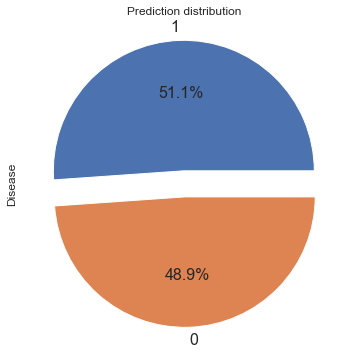

In [142]:
# Prediction distribution
plt.figure(figsize=(6,6))
labels['Disease'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=False, textprops={'fontsize':16}).set_title("Prediction distribution")


In [143]:
labels.to_csv('Group11_Version28.csv', index = None)